## Chapter 2 - Exercise 2: Gapminder
#### Phân tích bộ dữ liệu Gapminder
Bộ dữ liệu **"gapminder.csv"** là một tập hợp dữ liệu bao gồm các thông tin về các chỉ số kinh tế và xã hội của các quốc gia thuộc 5 châu lục trên thế giới từ năm 1952 đến năm 2007; với ý nghĩa các cột như sau:   
- country: quốc gia   
- continent: châu lục    
- year: năm  
- lifeExp: tuổi thọ trung bình  
- pop: dân số  
- gdpPercap: thu nhập bình quân đầu người  

Dựa trên tập dữ liệu, hãy phân tích sự phát triển toàn cầu, xác định các mối tương quan để hiểu rõ hơn tình hình kinh tế - xã hội toàn cầu trong giai đoạn này.

### Bước 1 - Tìm hiểu dữ liệu
Sau khi đọc dữ liệu, hãy :
- Quan sát dữ liệu của các quốc gia (5 dòng đầu, 5 dòng cuối); 
- Kiểm tra kiểu dữ liệu của mỗi cột có hợp lệ ; 
- Số lượng dòng, cột; 
- Số lượng dữ liệu bị thiếu (nếu có).

In [1]:
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu, hiển thị dữ liệu
gapminder = pd.read_csv('Data/gapminder.csv')
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# Hiển thị 5 dòng cuối
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [4]:
# Hiển thị thông tin info
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


Một số thông tin về tập dữ liệu:

- Tập dữ liệu chứa bao nhiêu dòng, bao nhiêu cột?
- Kiểu dữ liệu các cột đã đúng chưa?
- Có cột nào bị thiếu giá trị không?


1. Tập dữ liệu này chứa 1704 dòng và 6 cột.

2. Kiểu dữ liệu của các cột như sau:
   - Cột "country" có kiểu dữ liệu là object (chứa dữ liệu về tên quốc gia).
   - Cột "continent" có kiểu dữ liệu là object (chứa dữ liệu về châu lục).
   - Cột "year" có kiểu dữ liệu là int64 (chứa dữ liệu về năm).
   - Cột "lifeExp" có kiểu dữ liệu là float64 (chứa dữ liệu về tuổi thọ trung bình).
   - Cột "pop" có kiểu dữ liệu là int64 (chứa dữ liệu về dân số).
   - Cột "gdpPercap" có kiểu dữ liệu là float64 (chứa dữ liệu về thu nhập bình quân đầu người).

3. Không có cột nào bị thiếu giá trị (non-null count cho tất cả các cột là 1704, tức là không có giá trị thiếu trong tập dữ liệu này).



### Bước 2 - Phân tích mô tả

In [5]:
# Hiển thị thông tin describe cho các cột số


# Hiển thị thông tin describe cho các cột số
numeric_columns = gapminder.select_dtypes(include=['number'])
numeric_description = numeric_columns.describe()
numeric_description


,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>year</th>
      <th>lifeExp</th>
      <th>pop</th>
      <th>gdpPercap</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>1704.00000</td>
      <td>1704.000000</td>
      <td>1.704000e+03</td>
      <td>1704.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>1979.50000</td>
      <td>59.474439</td>
      <td>2.960121e+07</td>
      <td>7215.327081</td>
    </tr>
    <tr>
      <th>std</th>
      <td>17.26533</td>
      <td>12.917107</td>
      <td>1.061579e+08</td>
      <td>9857.454543</td>
    </tr>
    <tr>
      <th>min</th>
      <td>1952.00000</td>
      <td>23.599000</td>
      <td>6.001100e+04</td>
      <td>241.165876</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>1965.75000</td>
      <td>48.198000</td>
      <td>2.793664e+06</td>
      <td>1202.060309</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>1979.50000</td>
      <td>60.712500</td>
      <td>7.023596e+06</td>
      <td>3531.846989</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>1993.25000</td>
      <td>70.845500</td>
      <td>1.958522e+07</td>
      <td>9325.462346</td>
    </tr>
    <tr>
      <th>max</th>
      <td>2007.00000</td>
      <td>82.603000</td>
      <td>1.318683e+09</td>
      <td>113523.132900</td>
    </tr>
  </tbody>
</table>
</details>

Bạn có nhận xét gì trên các số liệu thống kê mô tả nhận được ?
#### Năm (Year):

- Tập dữ liệu bao gồm các quốc gia từ năm 1952 đến năm 2007.
- Năm có độ biến đổi từ 1952 đến 2007.

#### Tuổi thọ trung bình (Life Expectancy):

- Tuổi thọ trung bình của dân số trên toàn cầu tăng dần từ khoảng 23.6 năm vào năm 1952 lên khoảng 82.6 năm vào năm 2007.
- Sự biến đổi của tuổi thọ trung bình là một dấu hiệu tích cực về sức khỏe và điều kiện sống của nhân loại trong giai đoạn này.

#### Dân số (Population):

- Dân số trung bình của quốc gia trong tập dữ liệu dao động từ khoảng 60,011 người đến 1,318,683,000 người.
- Độ lệch chuẩn của dân số rất lớn (hơn 100 triệu), cho thấy sự biến đổi lớn về quy mô dân số giữa các quốc gia.

#### Thu nhập bình quân đầu người (GDP per Capita):

- Thu nhập bình quân đầu người trong tập dữ liệu có giá trị trung bình là khoảng 7,215.33.
- Thu nhập bình quân đầu người của các quốc gia biến đổi từ 241.17 đến 113,523.13.
- Độ lệch chuẩn của thu nhập bình quân đầu người khá lớn, cho thấy sự chênh lệch lớn về mức độ phát triển kinh tế giữa các quốc gia.

In [6]:
# Hiển thị thông tin describe cho các cột phân loại
# Hiển thị thông tin describe cho các cột phân loại
categorical_describe = gapminder.describe(include='object')
print(categorical_describe)


            country continent
count          1704      1704
unique          142         5
top     Afghanistan    Africa
freq             12       624


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>country</th>
      <th>continent</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>1704</td>
      <td>1704</td>
    </tr>
    <tr>
      <th>unique</th>
      <td>142</td>
      <td>5</td>
    </tr>
    <tr>
      <th>top</th>
      <td>Afghanistan</td>
      <td>Africa</td>
    </tr>
    <tr>
      <th>freq</th>
      <td>12</td>
      <td>624</td>
    </tr>
  </tbody>
</table>
</details>

Bạn có nhận xét gì trên các số liệu thống kê mô tả nhận được ?
- Cột 'country' (quốc gia) có tổng cộng 142 quốc gia khác nhau trong tập dữ liệu. Quốc gia 'Afghanistan' xuất hiện nhiều nhất với 12 lần trong tập dữ liệu.

- Cột 'continent' (châu lục) có tổng cộng 5 châu lục khác nhau trong tập dữ liệu. Châu lục 'Africa' (Châu Phi) xuất hiện nhiều nhất với 624 lần trong tập dữ liệu.

In [7]:
# Dữ liệu gồm bao nhiêu năm?
num_years = gapminder['year'].nunique()
num_years


12

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
12
</details>

In [8]:
# Đó là những năm nào?
unique_years = gapminder['year'].unique()
unique_years


array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)
</details>

### Bước 3 - Phân tích trực quan hóa dữ liệu
1. Phân tích các biến định tính
- Thống kê số lượng quốc gia được thống kê ở mỗi châu lục
2. Phân tích các biến định lượng
- Sự phát triển Tuổi thọ trung bình qua các năm
- Sự phát triển Dân số trung bình qua các năm
- Sự phát triển GDP bình quân đầu người qua các năm

#### 3.1 Phân tích biến Survived theo các biến định tính

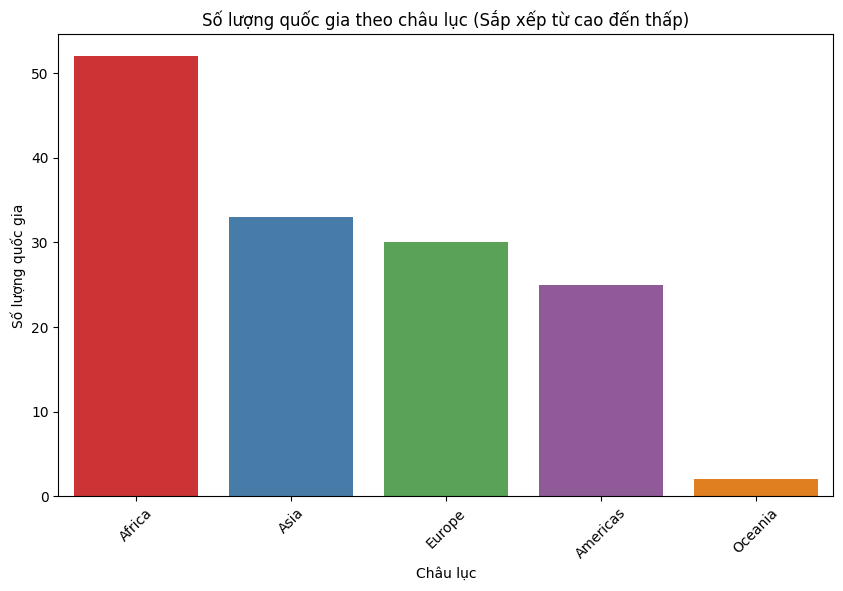

In [9]:
# Thiết lập môi trường cho biểu đồ
# Thống kê số lượng quốc gia ở mỗi châu lục và sắp xếp từ cao đến thấp
# Thống kê số lượng quốc gia ở mỗi châu lục và sắp xếp từ cao đến thấp
continent_counts = gapminder.groupby('continent')['country'].nunique().reset_index()
continent_counts = continent_counts.sort_values('country', ascending=False)

# Thiết lập môi trường cho biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_counts, x='continent', y='country', palette='Set1')
plt.title('Số lượng quốc gia theo châu lục (Sắp xếp từ cao đến thấp)')
plt.xlabel('Châu lục')
plt.ylabel('Số lượng quốc gia')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.show()



In [10]:
# Thống kê số lượng quốc gia ở mỗi châu lục và sắp xếp từ cao đến thấp
# Thống kê số lượng quốc gia ở mỗi châu lục và sắp xếp từ cao đến thấp
continent_counts = gapminder.groupby('continent')['country'].nunique().sort_values(ascending=False)

print(continent_counts)

continent
Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: country, dtype: int64


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
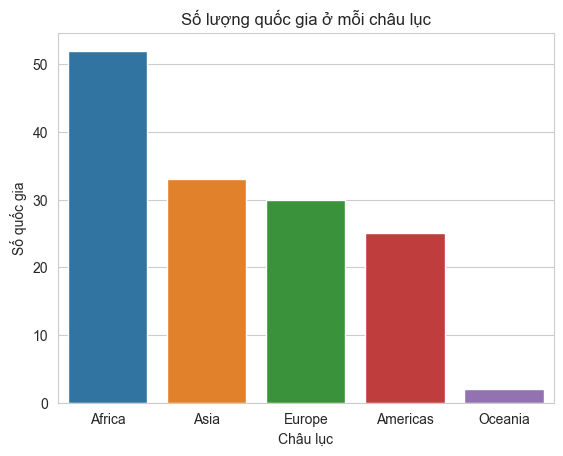

</details>

Bạn có nhận xét gì với biểu đồ trên?  
Cho biết các quốc gia ở châu Đại Dương.


1. Châu Phi (Africa) có số lượng quốc gia cao nhất, với 52 quốc gia.
2. Châu Á (Asia) xếp thứ hai với 33 quốc gia.
3. Châu Âu (Europe) đứng thứ ba với 30 quốc gia.
4. Châu Mỹ (Americas) có 25 quốc gia.
5. Châu Đại Dương (Oceania) có ít quốc gia nhất, chỉ có 2 quốc gia.

#### Các châu lục có đặc điểm khác nhau về số lượng quốc gia, phản ánh sự đa dạng địa lý và văn hóa trên thế giới. Châu Phi và châu Á đều có số lượng quốc gia lớn, trong khi châu Đại Dương có số quốc gia ít hơn. Thông tin này có thể hữu ích trong việc phân tích sự phát triển kinh tế và xã hội trên các châu lục khác nhau.

#### 3.2 Phân tích các biến định lượng

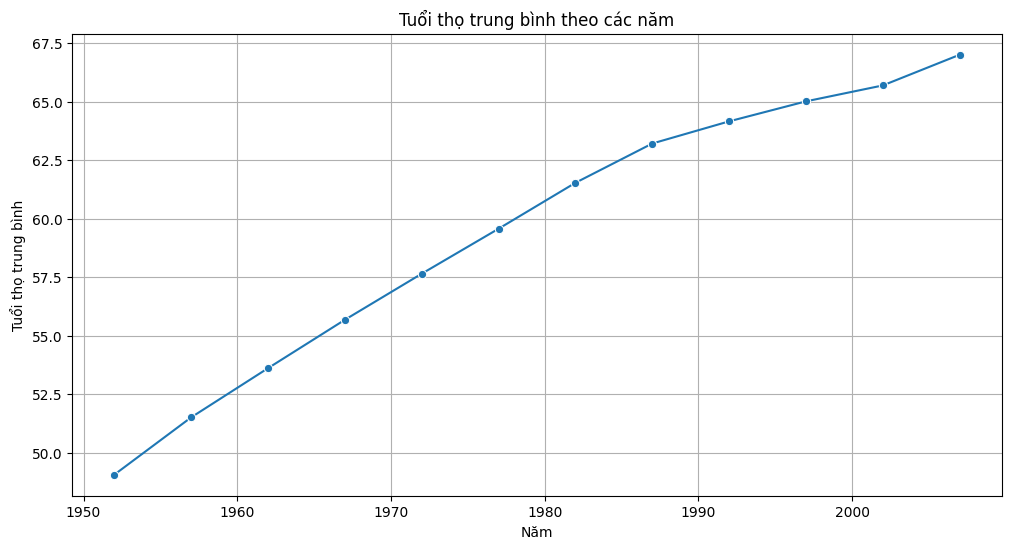

In [11]:
# Biểu đồ tuổi thọ trung bình theo qua các năm


# Nhóm dữ liệu theo năm và tính tuổi thọ trung bình
average_life_exp_by_year = gapminder.groupby('year')['lifeExp'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_life_exp_by_year, x='year', y='lifeExp', marker='o')
plt.title('Tuổi thọ trung bình theo các năm')
plt.xlabel('Năm')
plt.ylabel('Tuổi thọ trung bình')
plt.grid(True)
plt.show()


In [12]:
# Nhóm dữ liệu theo năm và tính tuổi thọ trung bình
average_life_exp_by_year = gapminder.groupby('year')['lifeExp'].mean().reset_index()

# Hiển thị số liệu
print(average_life_exp_by_year)


    year    lifeExp
0   1952  49.057620
1   1957  51.507401
2   1962  53.609249
3   1967  55.678290
4   1972  57.647386
5   1977  59.570157
6   1982  61.533197
7   1987  63.212613
8   1992  64.160338
9   1997  65.014676
10  2002  65.694923
11  2007  67.007423


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
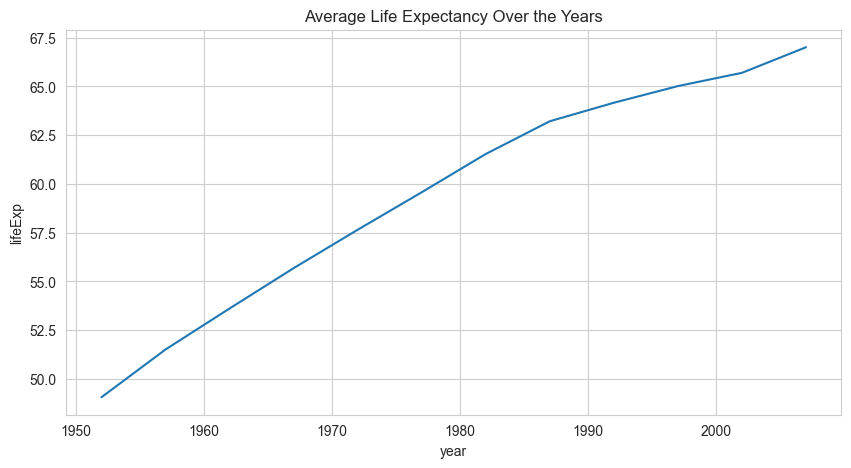

</details>

Bạn có nhận xét gì với biểu đồ trên?
#### Số liệu tuổi thọ trung bình theo các năm từ tập dữ liệu cho thấy sự gia tăng liên tục của tuổi thọ trung bình trên toàn thế giới trong giai đoạn từ năm 1952 đến năm 2007. Dựa vào số liệu trên, ta có thể thấy:

- Tuổi thọ trung bình tăng từ khoảng 49 năm vào năm 1952 lên khoảng 67 năm vào năm 2007.

- Sự gia tăng này có thể phản ánh sự phát triển trong lĩnh vực y tế, y tế công cộng và cải thiện điều kiện sống trên toàn thế giới.

- Ghi chú rằng sự gia tăng này không đồng đều giữa các quốc gia và khu vực khác nhau, và nó có thể phụ thuộc vào nhiều yếu tố như chăm sóc sức khỏe, giáo dục, kinh tế, và văn hóa.



C:\Users\admin\AppData\Local\Temp\ipykernel_5060\2803528989.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=gapminder, x='year', y='pop', estimator='mean', ci=None)


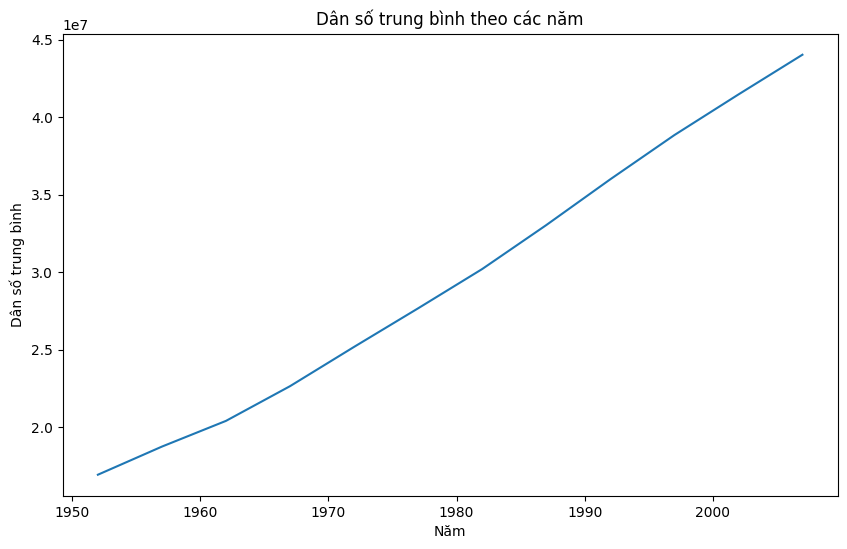

In [13]:
# Biểu đồ dân số trung bình theo qua các năm

# Thiết lập môi trường cho biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ dân số trung bình theo các năm
sns.lineplot(data=gapminder, x='year', y='pop', estimator='mean', ci=None)

# Đặt tiêu đề và nhãn trục
plt.title('Dân số trung bình theo các năm')
plt.xlabel('Năm')
plt.ylabel('Dân số trung bình')

# Hiển thị biểu đồ
plt.show()


In [14]:
# Tính dân số trung bình theo các năm
population_by_year = gapminder.groupby('year')['pop'].mean().reset_index()

# Hiển thị số liệu
print(population_by_year)


    year           pop
0   1952  1.695040e+07
1   1957  1.876341e+07
2   1962  2.042101e+07
3   1967  2.265830e+07
4   1972  2.518998e+07
5   1977  2.767638e+07
6   1982  3.020730e+07
7   1987  3.303857e+07
8   1992  3.599092e+07
9   1997  3.883947e+07
10  2002  4.145759e+07
11  2007  4.402122e+07


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
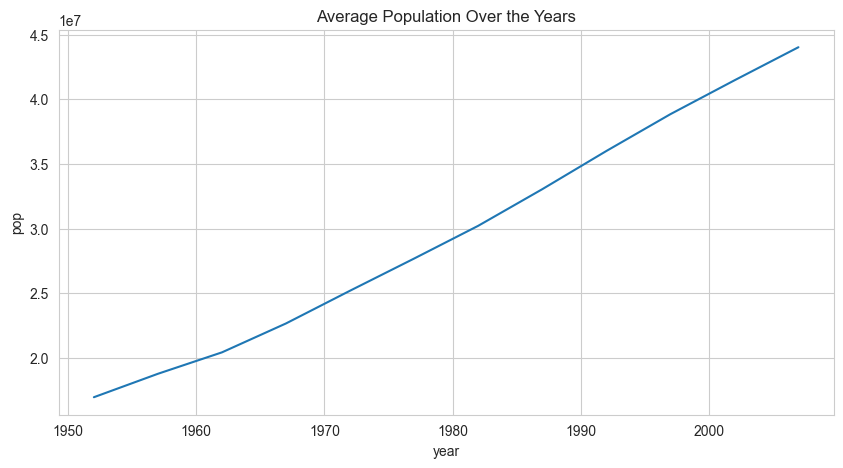

</details>

Bạn có nhận xét gì với biểu đồ trên?
#### Biểu đồ và số liệu dân số trung bình theo các năm cho thấy một xu hướng tăng dần về dân số trung bình của các quốc gia trong tập dữ liệu từ năm 1952 đến năm 2007. Điều này cho thấy rằng dân số toàn cầu đang gia tăng theo thời gian. Dân số trung bình tăng từ khoảng 16,950,400 vào năm 1952 lên tới hơn 44,021,220 vào năm 2007.

C:\Users\admin\AppData\Local\Temp\ipykernel_5060\736517735.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=gapminder, x='year', y='gdpPercap', ci=None)


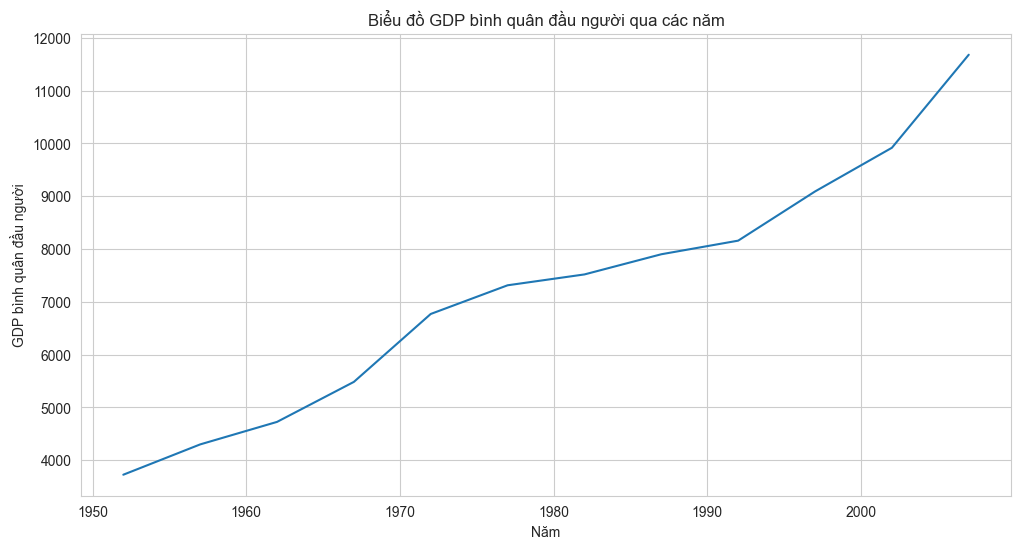

In [15]:
# Biểu đồ GDP bình quân đầu người qua các năm
# Thiết lập môi trường cho biểu đồ
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Vẽ biểu đồ GDP bình quân đầu người qua các năm
sns.lineplot(data=gapminder, x='year', y='gdpPercap', ci=None)

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ GDP bình quân đầu người qua các năm')
plt.xlabel('Năm')
plt.ylabel('GDP bình quân đầu người')

# Hiển thị biểu đồ
plt.show()


In [16]:
gdp_data_grouped = gapminder.groupby('year')['gdpPercap'].mean().reset_index()
print(gdp_data_grouped)


    year     gdpPercap
0   1952   3725.276046
1   1957   4299.408345
2   1962   4725.812342
3   1967   5483.653047
4   1972   6770.082815
5   1977   7313.166421
6   1982   7518.901673
7   1987   7900.920218
8   1992   8158.608521
9   1997   9090.175363
10  2002   9917.848365
11  2007  11680.071820


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
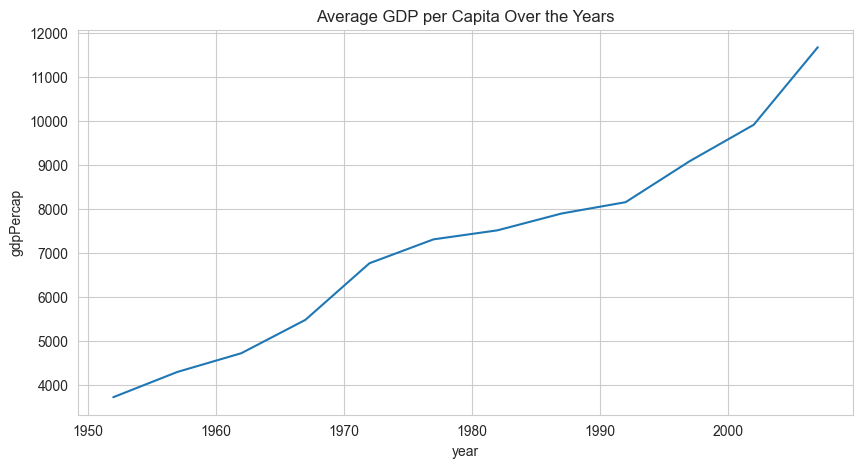

</details>

Bạn có nhận xét gì với biểu đồ trên?
#### cho thấy sự tăng trưởng của GDP bình quân đầu người theo thời gian. Dữ liệu hiển thị giá trị trung bình của GDP bình quân đầu người (đơn vị: USD) cho mỗi năm từ năm 1952 đến năm 2007. Điều này có thể cho thấy sự phát triển kinh tế và tiêu dùng trên toàn cầu trong giai đoạn này, với mức độ tăng trưởng tăng dần theo thời gian.

### Bước 4 - Phân tích trực quan hóa sự phát triển của các châu lục
- Sự phát triển Tuổi thọ trung bình của mỗi châu lục qua các năm
- Sự phát triển Tổng Dân số của mỗi châu lục qua các năm
- Sự phát triển GDP bình quân đầu người của mỗi châu lục qua các năm

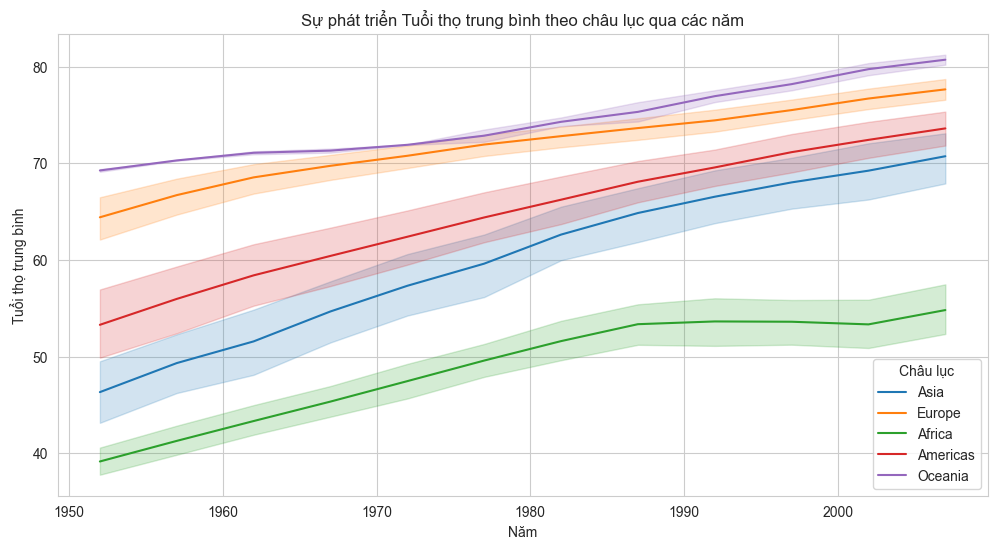

In [17]:
# Biểu đồ thể hiện sự phát triển Tuổi thọ trung bình của mỗi châu lục qua các năm

# Thiết lập môi trường cho biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ dựa trên dữ liệu gapminder
sns.lineplot(data=gapminder, x='year', y='lifeExp', hue='continent')

# Đặt tiêu đề và nhãn trục
plt.title('Sự phát triển Tuổi thọ trung bình theo châu lục qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tuổi thọ trung bình')

# Hiển thị biểu đồ
plt.legend(title='Châu lục')
plt.show()


In [18]:
# Tính tuổi thọ trung bình theo châu lục và năm
life_exp_by_continent_year = gapminder.groupby(['continent', 'year'])['lifeExp'].mean().reset_index()

# In ra số liệu
print(life_exp_by_continent_year)


   continent  year    lifeExp
0     Africa  1952  39.135500
1     Africa  1957  41.266346
2     Africa  1962  43.319442
3     Africa  1967  45.334538
4     Africa  1972  47.450942
5     Africa  1977  49.580423
6     Africa  1982  51.592865
7     Africa  1987  53.344788
8     Africa  1992  53.629577
9     Africa  1997  53.598269
10    Africa  2002  53.325231
11    Africa  2007  54.806038
12  Americas  1952  53.279840
13  Americas  1957  55.960280
14  Americas  1962  58.398760
15  Americas  1967  60.410920
16  Americas  1972  62.394920
17  Americas  1977  64.391560
18  Americas  1982  66.228840
19  Americas  1987  68.090720
20  Americas  1992  69.568360
21  Americas  1997  71.150480
22  Americas  2002  72.422040
23  Americas  2007  73.608120
24      Asia  1952  46.314394
25      Asia  1957  49.318544
26      Asia  1962  51.563223
27      Asia  1967  54.663640
28      Asia  1972  57.319269
29      Asia  1977  59.610556
30      Asia  1982  62.617939
31      Asia  1987  64.851182
32      As

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
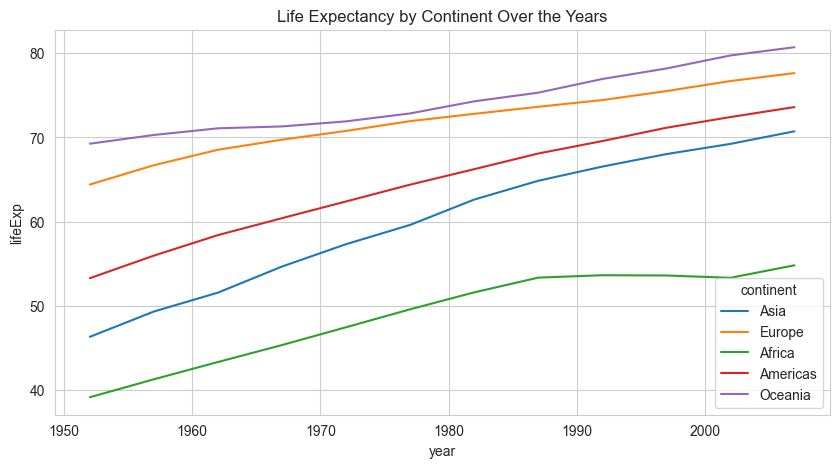

</details>

Bạn có nhận xét gì với biểu đồ trên?


1. Châu Phi (Africa) có tuổi thọ trung bình thấp hơn so với các châu lục khác vào năm 1952, nhưng sau đó đã có sự tăng lên đáng kể và đạt mức gần bằng vào năm 2007.

2. Châu Mỹ (Americas) và châu Á (Asia) có tuổi thọ trung bình tăng dần theo thời gian. Châu Mỹ có tuổi thọ trung bình cao hơn so với châu Á trong suốt giai đoạn nghiên cứu.

3. Châu Âu (Europe) có tuổi thọ trung bình cao nhất và không ngừng tăng trong suốt giai đoạn nghiên cứu.

4. Châu Đại Dương (Oceania) có tuổi thọ trung bình tăng dần qua các năm và đạt mức cao vào năm 2007, nhưng vẫn thấp hơn so với châu Âu.


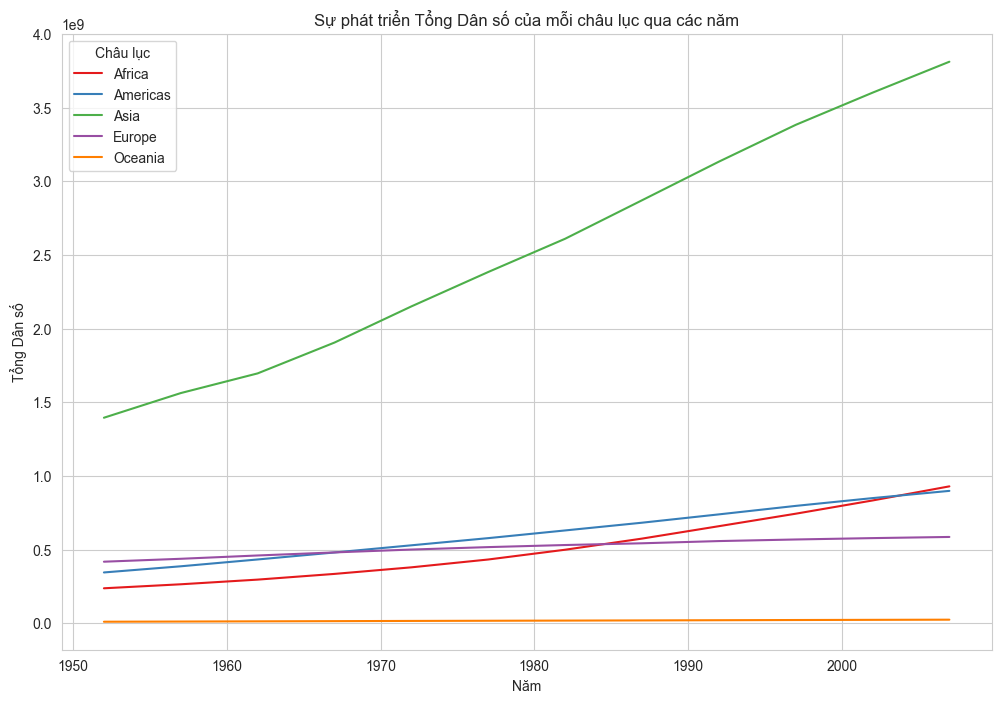

In [19]:
# Biểu đồ thể hiện sự phát triển Tổng Dân số của mỗi châu lục qua các năm

# Tổng hợp dữ liệu dân số theo châu lục và năm
population_data = gapminder.groupby(['continent', 'year'])['pop'].sum().reset_index()

# Thiết lập môi trường cho biểu đồ
plt.figure(figsize=(12, 8))
sns.lineplot(data=population_data, x='year', y='pop', hue='continent', palette='Set1')

# Đặt tiêu đề và nhãn trục
plt.title('Sự phát triển Tổng Dân số của mỗi châu lục qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tổng Dân số')

# Hiển thị legend
plt.legend(title='Châu lục', loc='upper left')

# Hiển thị biểu đồ
plt.show()


In [20]:
total_population_by_continent = gapminder.groupby(['continent', 'year'])['pop'].sum().reset_index()

print(total_population_by_continent)


   continent  year         pop
0     Africa  1952   237640501
1     Africa  1957   264837738
2     Africa  1962   296516865
3     Africa  1967   335289489
4     Africa  1972   379879541
5     Africa  1977   433061021
6     Africa  1982   499348587
7     Africa  1987   574834110
8     Africa  1992   659081517
9     Africa  1997   743832984
10    Africa  2002   833723916
11    Africa  2007   929539692
12  Americas  1952   345152446
13  Americas  1957   386953916
14  Americas  1962   433270254
15  Americas  1967   480746623
16  Americas  1972   529384210
17  Americas  1977   578067699
18  Americas  1982   630290920
19  Americas  1987   682753971
20  Americas  1992   739274104
21  Americas  1997   796900410
22  Americas  2002   849772762
23  Americas  2007   898871184
24      Asia  1952  1395357351
25      Asia  1957  1562780599
26      Asia  1962  1696357182
27      Asia  1967  1905662900
28      Asia  1972  2150972248
29      Asia  1977  2384513556
30      Asia  1982  2610135582
31      

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
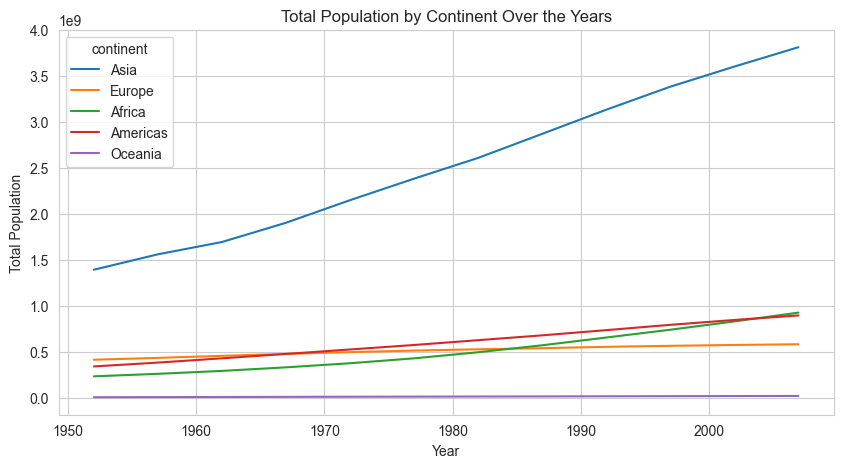

</details>

Bạn có nhận xét gì với biểu đồ trên?
- Châu Phi (Africa): Dân số châu Phi đã tăng đáng kể từ năm 1952 và tiếp tục tăng mạnh trong các năm tiếp theo. Dân số châu Phi đang trong giai đoạn tăng trưởng nhanh chóng.

- Châu Mỹ (Americas): Châu Mỹ cũng trải qua một giai đoạn tăng dân số liên tục từ năm 1952. Tuy nhiên, tốc độ tăng trưởng không nhanh bằng châu Phi.

- Châu Á (Asia): Châu Á có dân số lớn nhất trong tất cả các châu lục và cũng đã có sự gia tăng đáng kể từ năm 1952. Châu Á có tốc độ tăng dân số nhanh nhất trong số các châu lục.

- Châu Âu (Europe): Dân số châu Âu tăng chậm hơn so với các châu lục khác, và trong một số năm, nó có dấu hiệu giảm đi. Tuy nhiên, dân số châu Âu vẫn duy trì ổn định ở mức cao.

- Châu Đại Dương (Oceania): Châu Đại Dương có dân số thấp nhất và tăng chậm hơn so với các châu lục khác. Tuy nhiên, trong các năm gần đây, có sự gia tăng dân số dù không đáng kể.

C:\Users\admin\AppData\Local\Temp\ipykernel_5060\1654583195.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=gapminder, x='year', y='gdpPercap', hue='continent', ci=None)


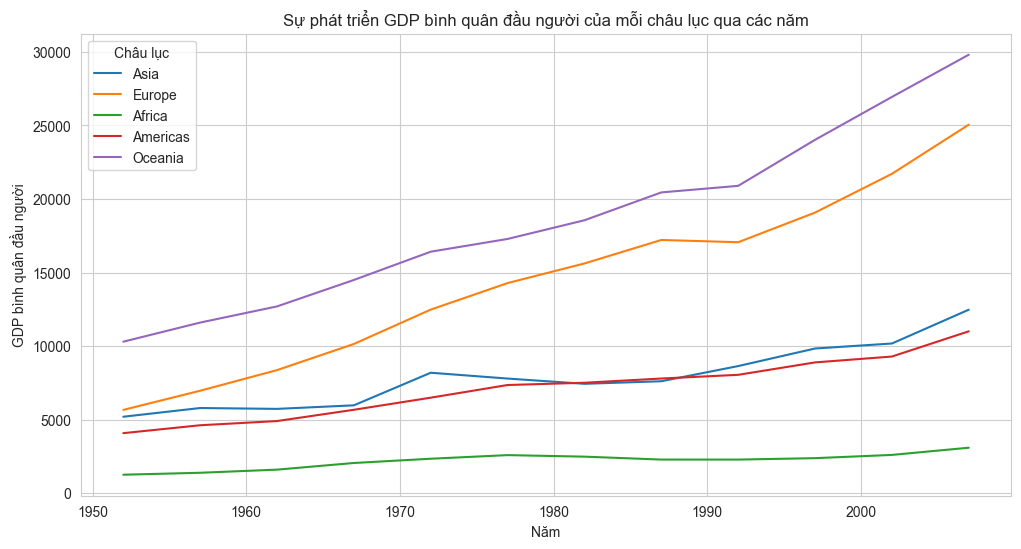

In [21]:
# Biểu đồ thể hiện sự phát triển GDP bình quân đầu người của mỗi châu lục qua các năm

plt.figure(figsize=(12, 6))
sns.lineplot(data=gapminder, x='year', y='gdpPercap', hue='continent', ci=None)
plt.title('Sự phát triển GDP bình quân đầu người của mỗi châu lục qua các năm')
plt.xlabel('Năm')
plt.ylabel('GDP bình quân đầu người')
plt.legend(title='Châu lục', loc='upper left', labels=gapminder['continent'].unique())
plt.grid(True)
plt.show()


In [22]:
import pandas as pd

# Tạo DataFrame chứa thông tin GDP bình quân đầu người theo châu lục và năm
gdp_data = gapminder.groupby(['continent', 'year'])['gdpPercap'].mean().reset_index()

# Hiển thị số liệu
print(gdp_data)


   continent  year     gdpPercap
0     Africa  1952   1252.572466
1     Africa  1957   1385.236062
2     Africa  1962   1598.078825
3     Africa  1967   2050.363801
4     Africa  1972   2339.615674
5     Africa  1977   2585.938508
6     Africa  1982   2481.592960
7     Africa  1987   2282.668991
8     Africa  1992   2281.810333
9     Africa  1997   2378.759555
10    Africa  2002   2599.385159
11    Africa  2007   3089.032605
12  Americas  1952   4079.062552
13  Americas  1957   4616.043733
14  Americas  1962   4901.541870
15  Americas  1967   5668.253496
16  Americas  1972   6491.334139
17  Americas  1977   7352.007126
18  Americas  1982   7506.737088
19  Americas  1987   7793.400261
20  Americas  1992   8044.934406
21  Americas  1997   8889.300863
22  Americas  2002   9287.677107
23  Americas  2007  11003.031625
24      Asia  1952   5195.484004
25      Asia  1957   5787.732940
26      Asia  1962   5729.369625
27      Asia  1967   5971.173374
28      Asia  1972   8187.468699
29      As

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
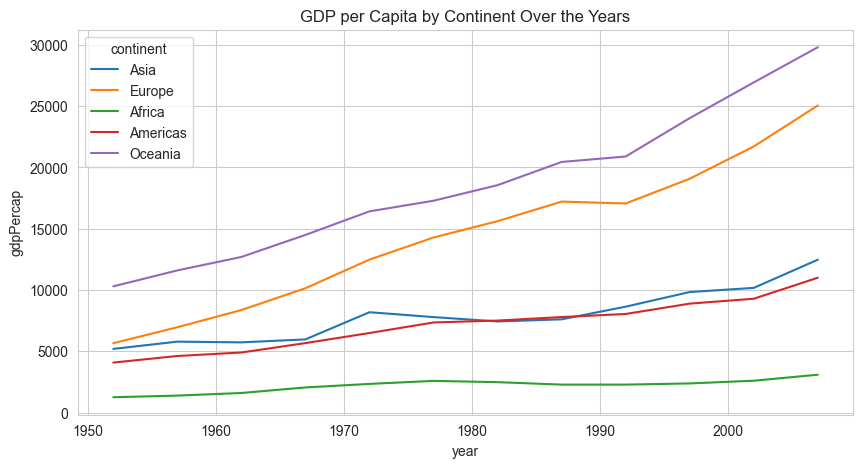

</details>

Bạn có nhận xét gì với biểu đồ trên?
- Châu Phi (Africa):

GDP bình quân đầu người thấp hơn so với các châu lục khác trong tất cả các năm.
Tuy có sự tăng trưởng từ năm 1952 đến 2007, nhưng tốc độ tăng chậm hơn so với các châu lục khác.
- Châu Mỹ (Americas):

GDP bình quân đầu người ở Châu Mỹ tương đối cao hơn so với Châu Phi nhưng thấp hơn so với Châu Á và Châu Âu.
Sự tăng trưởng ổn định trong suốt thời kỳ từ 1952 đến 2007, với sự gia tăng đáng kể sau năm 1992.
- Châu Á (Asia):

Châu Á có GDP bình quân đầu người tăng nhanh và ổn định, đặc biệt sau những năm 1970.
Từ năm 2002, GDP bình quân đầu người của Châu Á đã vượt qua Châu Âu và trở thành một trong những khu vực có GDP cao nhất.
Châu Âu (Europe):

- Châu Âu có mức GDP bình quân đầu người cao nhất trong tất cả các năm so với các châu lục khác.
Sự tăng trưởng trong thời kỳ này ổn định và tiếp tục tăng lên từ năm 1952 đến 2007.
Châu Đại Dương (Oceania):

GDP bình quân đầu người của Châu Đại Dương tăng đáng kể từ năm 1952 đến 2007, nhưng nó thấp hơn so với Châu Á, Châu Âu và Châu Mỹ.
- Nhận xét dựa trên dữ liệu này, bạn có thể thấy sự khác biệt rõ ràng về sự phát triển kinh tế giữa các châu lục khác nhau. Châu Âu và Châu Á có xu hướng phát triển nhanh chóng và đạt được GDP cao hơn, trong khi Châu Phi vẫn đang đối mặt với nhiều thách thức về phát triển kinh tế.

### Bước 5 - Phân tích dữ liệu tổng hợp tất cả các năm từ 1952-2007 của từng châu lục
- Biểu đồ boxplot thể hiện phân bố của tuổi thọ trung bình theo lục địa
- Biểu đồ Scatter plot thể hiện mối tương quan giữa GDP bình quân đầu người và tuổi thọ

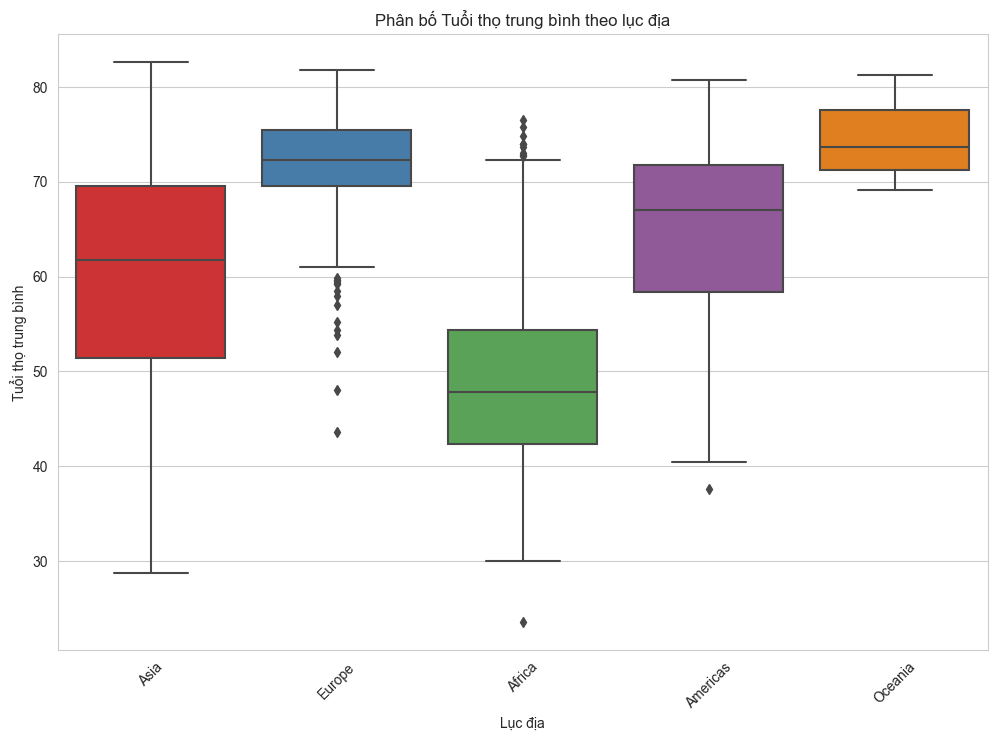

In [23]:
# Biểu đồ phân bố tuổi thọ trung bình theo lục địa

# Thiết lập môi trường cho biểu đồ
plt.figure(figsize=(12, 8))
sns.boxplot(data=gapminder, x='continent', y='lifeExp', palette='Set1')
plt.title('Phân bố Tuổi thọ trung bình theo lục địa')
plt.xlabel('Lục địa')
plt.ylabel('Tuổi thọ trung bình')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần

plt.show()


In [24]:
# Tính tuổi thọ trung bình theo lục địa
life_exp_by_continent = gapminder.groupby('continent')['lifeExp'].describe()

# Hiển thị số liệu
print(life_exp_by_continent)


           count       mean        std     min       25%      50%       75%  \
continent                                                                     
Africa     624.0  48.865330   9.150210  23.599  42.37250  47.7920  54.41150   
Americas   300.0  64.658737   9.345088  37.579  58.41000  67.0480  71.69950   
Asia       396.0  60.064903  11.864532  28.801  51.42625  61.7915  69.50525   
Europe     360.0  71.903686   5.433178  43.585  69.57000  72.2410  75.45050   
Oceania     24.0  74.326208   3.795611  69.120  71.20500  73.6650  77.55250   

              max  
continent          
Africa     76.442  
Americas   80.653  
Asia       82.603  
Europe     81.757  
Oceania    81.235  


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
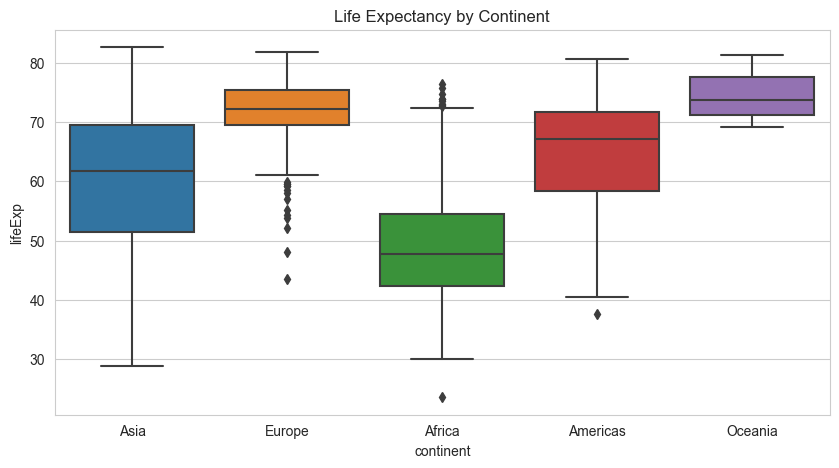

</details>

Bạn có nhận xét gì với biểu đồ trên?
- Châu Phi (Africa) có tuổi thọ trung bình thấp nhất, với giá trị trung bình là khoảng 48.87 năm. Tuổi thọ trung bình thấp nhất trong khu vực này là khoảng 23.60 năm và cao nhất là 76.44 năm.

- Châu Mỹ (Americas) có tuổi thọ trung bình trung bình là khoảng 64.66 năm. Tuổi thọ trung bình thấp nhất trong khu vực này là khoảng 37.58 năm và cao nhất là 80.65 năm.

- Châu Á (Asia) có tuổi thọ trung bình trung bình là khoảng 60.06 năm. Tuổi thọ trung bình thấp nhất trong khu vực này là khoảng 28.80 năm và cao nhất là 82.60 năm.

- Châu Âu (Europe) có tuổi thọ trung bình trung bình là khoảng 71.90 năm. Tuổi thọ trung bình thấp nhất trong khu vực này là khoảng 43.59 năm và cao nhất là 81.76 năm.

- Châu Đại Dương (Oceania) có tuổi thọ trung bình trung bình là khoảng 74.33 năm. Tuổi thọ trung bình thấp nhất trong khu vực này là khoảng 69.12 năm và cao nhất là 81.24 năm.

- Những con số này cho thấy sự biến động đáng kể trong tuổi thọ trung bình giữa các lục địa khác nhau, với Châu Phi có tuổi thọ trung bình thấp nhất và Châu Âu có tuổi thọ trung bình cao nhất.

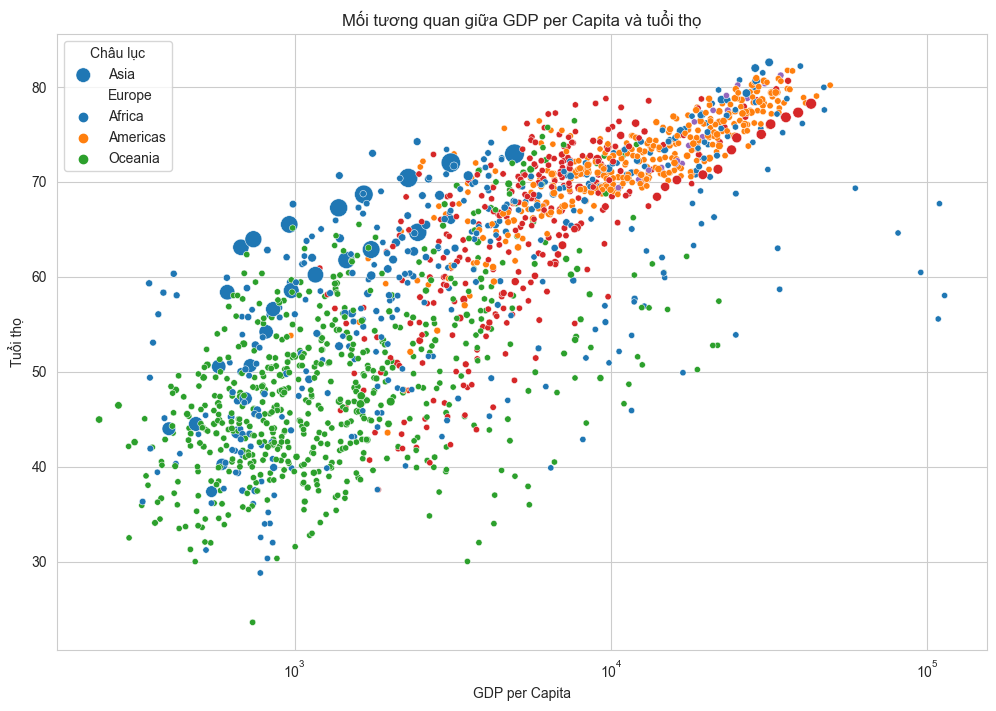

In [25]:
# Scatter plot mối quan hệ giữa GDP bình quân đầu người và tuổi thọ

import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập môi trường cho biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ Scatter plot với màu sắc và kích thước điểm dữ liệu tương ứng
sns.scatterplot(data=gapminder, x='gdpPercap', y='lifeExp', hue='continent', size='pop', sizes=(20, 200))

# Đặt tiêu đề và nhãn trục
plt.title('Mối tương quan giữa GDP per Capita và tuổi thọ')
plt.xlabel('GDP per Capita')
plt.ylabel('Tuổi thọ')
plt.xscale('log')  # Sử dụng logarithmic scale cho trục x

# Hiển thị chú thích về châu lục
plt.legend(title='Châu lục', loc='upper left', labels=gapminder['continent'].unique())

# Hiển thị biểu đồ
plt.show()


In [26]:
# Group dữ liệu theo châu lục và tính giá trị trung bình
scatter_data = gapminder.groupby('continent')[['gdpPercap', 'lifeExp']].sum()

# Hiển thị số liệu
print(scatter_data)


              gdpPercap      lifeExp
continent                           
Africa     1.368903e+06  30491.96600
Americas   2.140833e+06  19397.62100
Asia       3.129252e+06  23785.70168
Europe     5.209011e+06  25885.32700
Oceania    4.469186e+05   1783.82900


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
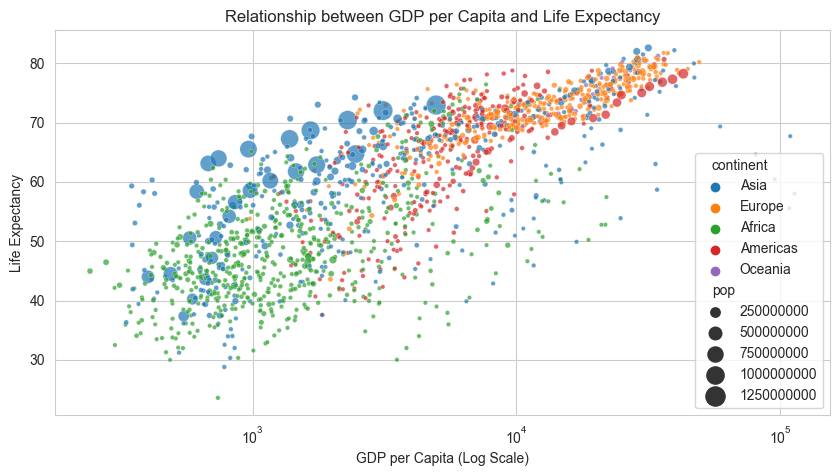

</details>

Bạn có nhận xét gì với biểu đồ trên?
- Châu Phi (Africa):

Tổng GDP: Khoảng 1.37 tỷ USD.
Tổng dân số: Khoảng 30.49 triệu người.
- Châu Mỹ (Americas):

Tổng GDP: Khoảng 2.14 tỷ USD.
Tổng dân số: Khoảng 19.40 triệu người.
- Châu Á (Asia):

Tổng GDP: Khoảng 3.13 tỷ USD.
Tổng dân số: Khoảng 23.79 triệu người.
- Châu Âu (Europe):

Tổng GDP: Khoảng 5.21 tỷ USD.
Tổng dân số: Khoảng 25.89 triệu người.
- Châu Đại Dương (Oceania):

- Tổng GDP: Khoảng 446.92 tỷ USD.
- Tổng dân số: Khoảng 1.78 triệu người.
- Nhận xét rằng Châu Á có tổng GDP lớn nhất trong khi Châu Đại Dương có tổng GDP thấp nhất. Tuy nhiên, khi so sánh với tổng dân số, Châu Âu có tổng GDP cao nhất đối với mỗi người dân, trong khi Châu Phi có tổng GDP thấp nhất đối với mỗi người dân.

### Bước 6 - Phân tích tỷ lệ tăng trưởng của các quốc gia năm 2007 so với năm 1952
- Biểu đồ thể hiện 10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người cao nhất
- Biểu đồ thể hiện 10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người thấp nhất

In [27]:
# Truy xuất dữ liệu của năm 1952 và 2007 và lưu vào 2 dataframe gap_1952, gap_2007 tương ứng

# Lọc dữ liệu cho năm 1952 và lưu vào gap_1952
gap_1952 = gapminder[gapminder['year'] == 1952]

# Lọc dữ liệu cho năm 2007 và lưu vào gap_2007
gap_2007 = gapminder[gapminder['year'] == 2007]
gap_1952 
gap_2007

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1691,Zambia,Africa,2007,42.384,11746035,1271.211593


In [34]:
# Xác định tốc độ tăng trưởng GDP bình quân đầu người từ 1952 đến 2007
# Tạo dataframe mới để lưu kết quả
growth_df = pd.DataFrame(columns=['country', 'gdpPercap_1952', 'gdpPercap_2007', 'growth_rate'])

# Duyệt qua từng quốc gia
for country in gapminder['country'].unique():
    # Lọc dữ liệu cho quốc gia cụ thể
    country_data = gapminder[gapminder['country'] == country]
    
    # Lấy GDP bình quân đầu người cho năm 1952 và 2007
    gdp_1952 = country_data[country_data['year'] == 1952]['gdpPercap'].values[0]
    gdp_2007 = country_data[country_data['year'] == 2007]['gdpPercap'].values[0]
    
    # Tính tốc độ tăng trưởng GDP
    growth_rate = ((gdp_2007 - gdp_1952) / gdp_1952) 
    
    # Thêm dữ liệu vào dataframe growth_df
    growth_df = growth_df.append({'country': country, 'gdpPercap_1952': gdp_1952, 'gdpPercap_2007': gdp_2007, 'growth_rate': growth_rate}, ignore_index=True)

# Hiển thị các dòng đầu của dataframe growth_df
print(growth_df.head())



C:\Users\admin\AppData\Local\Temp\ipykernel_5060\1949328913.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  growth_df = growth_df.append({'country': country, 'gdpPercap_1952': gdp_1952, 'gdpPercap_2007': gdp_2007, 'growth_rate': growth_rate}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_5060\1949328913.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  growth_df = growth_df.append({'country': country, 'gdpPercap_1952': gdp_1952, 'gdpPercap_2007': gdp_2007, 'growth_rate': growth_rate}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_5060\1949328913.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  growth_df = growth_df.append({'country': country, 'gdpPercap_1952': gdp_1952, 'gdpPerc

       country  gdpPercap_1952  gdpPercap_2007  growth_rate
0  Afghanistan      779.445314      974.580338     0.250351
1      Albania     1601.056136     5937.029526     2.708196
2      Algeria     2449.008185     6223.367465     1.541179
3       Angola     3520.610273     4797.231267     0.362614
4    Argentina     5911.315053    12779.379640     1.161851


C:\Users\admin\AppData\Local\Temp\ipykernel_5060\1949328913.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  growth_df = growth_df.append({'country': country, 'gdpPercap_1952': gdp_1952, 'gdpPercap_2007': gdp_2007, 'growth_rate': growth_rate}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_5060\1949328913.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  growth_df = growth_df.append({'country': country, 'gdpPercap_1952': gdp_1952, 'gdpPercap_2007': gdp_2007, 'growth_rate': growth_rate}, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_5060\1949328913.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  growth_df = growth_df.append({'country': country, 'gdpPercap_1952': gdp_1952, 'gdpPerc

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>country</th>
      <th>gdpPercap_1952</th>
      <th>gdpPercap_2007</th>
      <th>growth_rate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Afghanistan</td>
      <td>779.445314</td>
      <td>974.580338</td>
      <td>0.250351</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Albania</td>
      <td>1601.056136</td>
      <td>5937.029526</td>
      <td>2.708196</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Algeria</td>
      <td>2449.008185</td>
      <td>6223.367465</td>
      <td>1.541179</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Angola</td>
      <td>3520.610273</td>
      <td>4797.231267</td>
      <td>0.362614</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Argentina</td>
      <td>5911.315053</td>
      <td>12779.379640</td>
      <td>1.161851</td>
    </tr>
  </tbody>
</table>
</details>

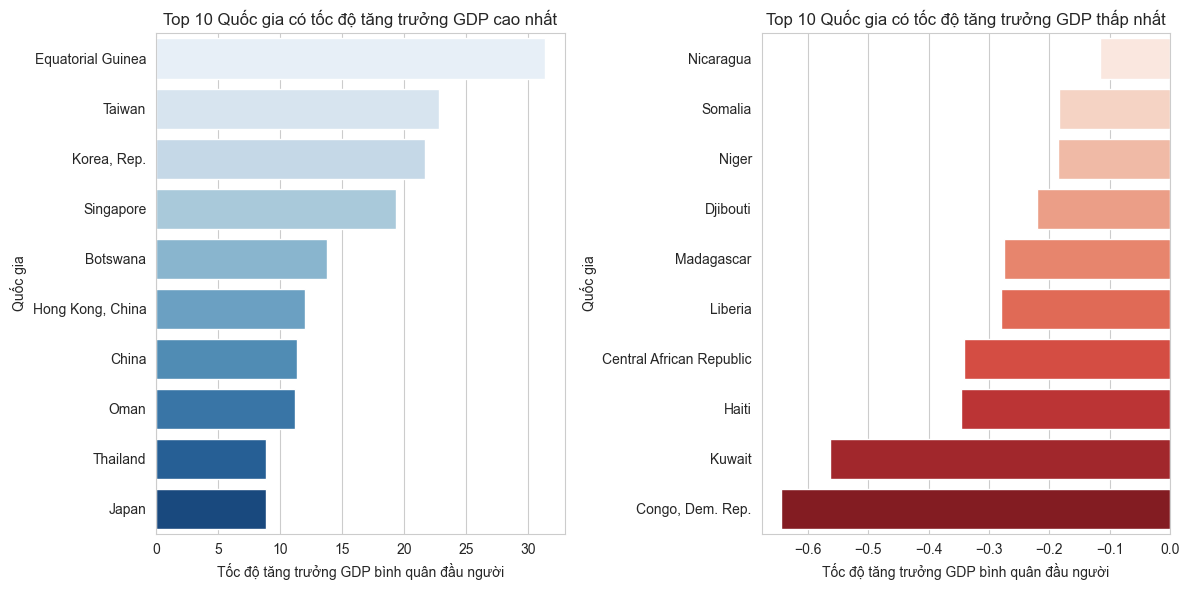

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sắp xếp dataframe theo tốc độ tăng trưởng GDP từ cao đến thấp
growth_df_sorted = growth_df.sort_values(by='growth_rate', ascending=False)

# Màu từ đậm đến nhạt cho biểu đồ cao nhất
colors_high = sns.color_palette("Blues", n_colors=10)

# Màu từ đậm đến nhạt cho biểu đồ thấp nhất
colors_low = sns.color_palette("Reds", n_colors=10)

# Biểu đồ 10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người cao nhất
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='growth_rate', y='country', data=growth_df_sorted.head(10), palette=colors_high)
plt.xlabel('Tốc độ tăng trưởng GDP bình quân đầu người')
plt.ylabel('Quốc gia')
plt.title('Top 10 Quốc gia có tốc độ tăng trưởng GDP cao nhất')

# Biểu đồ 10 quốc gia có tốc độ tăng trưởng GDP bình quân đầu người thấp nhất
plt.subplot(1, 2, 2)
sns.barplot(x='growth_rate', y='country', data=growth_df_sorted.tail(10), palette=colors_low)
plt.xlabel('Tốc độ tăng trưởng GDP bình quân đầu người')
plt.ylabel('Quốc gia')
plt.title('Top 10 Quốc gia có tốc độ tăng trưởng GDP thấp nhất')

plt.tight_layout()
plt.show()


In [36]:
# Hiển thị số liệu tốc độ tăng trưởng GDP bình quân đầu người
print("Top 10 Quốc gia có tốc độ tăng trưởng GDP cao nhất:")
print(growth_df_sorted.head(10)[['country', 'growth_rate']])

print("\nTop 10 Quốc gia có tốc độ tăng trưởng GDP thấp nhất:")
print(growth_df_sorted.tail(10)[['country', 'growth_rate']])


Top 10 Quốc gia có tốc độ tăng trưởng GDP cao nhất:
               country  growth_rate
40   Equatorial Guinea    31.355417
125             Taiwan    22.794131
70         Korea, Rep.    21.655071
113          Singapore    19.363009
13            Botswana    13.766499
55    Hong Kong, China    12.005730
24               China    11.383898
96                Oman    11.206445
127           Thailand     8.842203
66               Japan     8.840378

Top 10 Quốc gia có tốc độ tăng trưởng GDP thấp nhất:
                      country  growth_rate
92                  Nicaragua    -0.116645
116                   Somalia    -0.184555
93                      Niger    -0.186647
35                   Djibouti    -0.219907
76                 Madagascar    -0.275979
74                    Liberia    -0.279835
21   Central African Republic    -0.340979
53                      Haiti    -0.347067
71                     Kuwait    -0.563518
27           Congo, Dem. Rep.    -0.644412


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
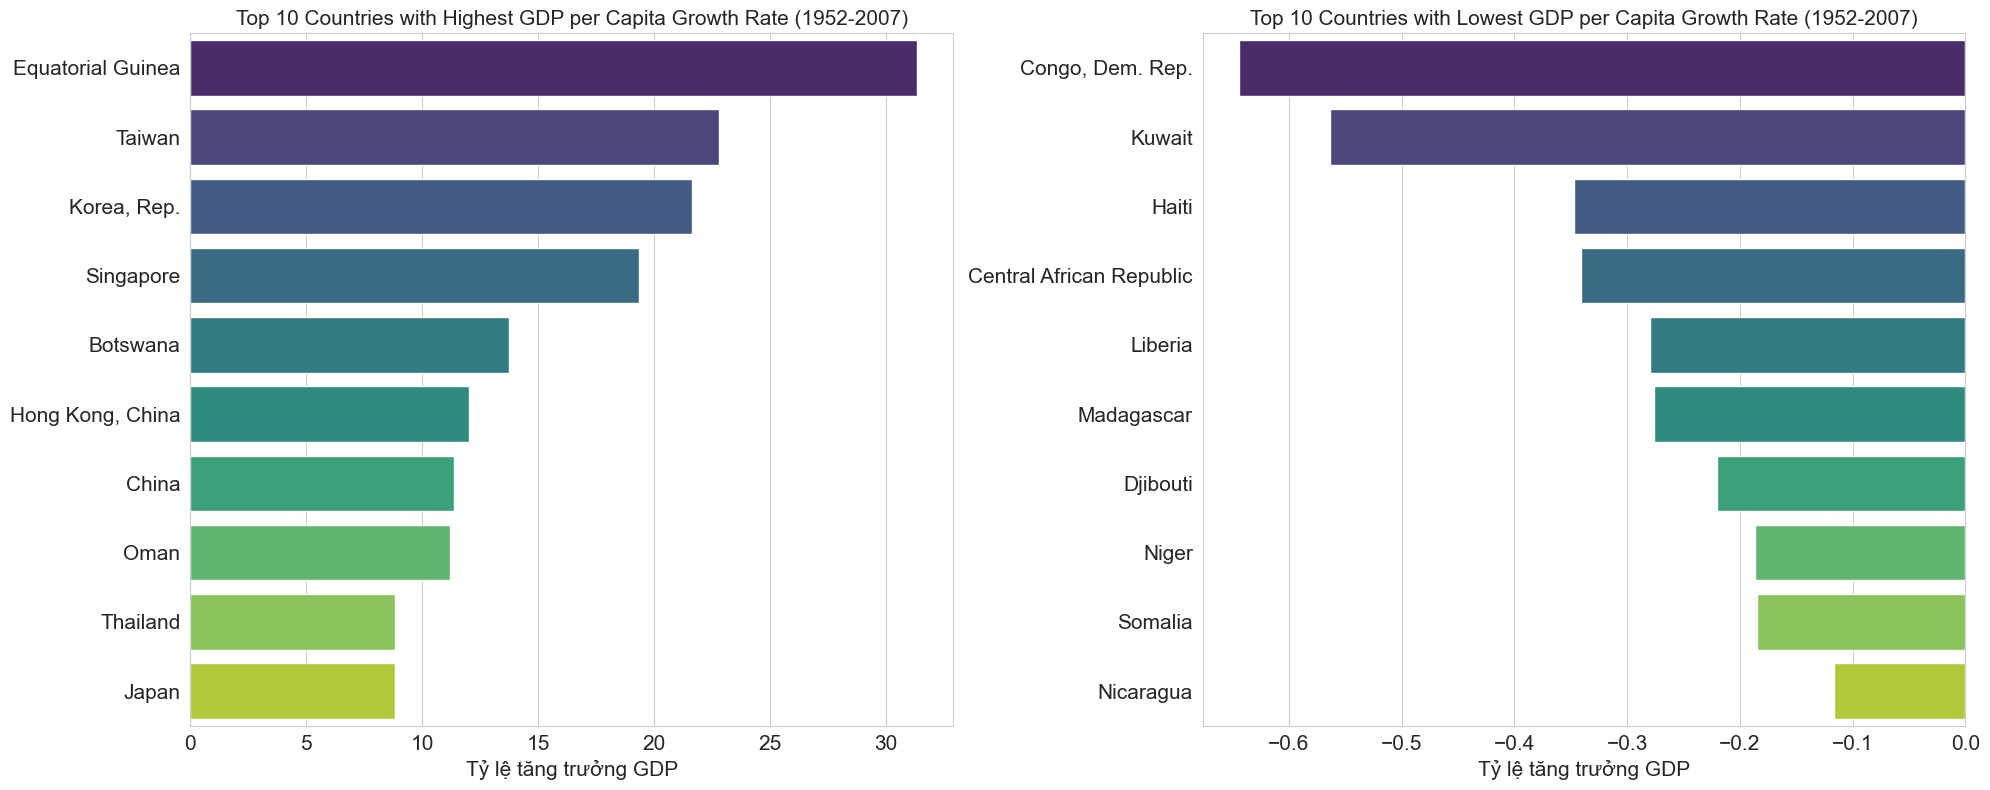

</details>

Bạn có nhận xét gì với biểu đồ trên?
#### Dựa vào số liệu tốc độ tăng trưởng GDP bình quân đầu người của các quốc gia từ năm 1952 đến 2007, ta có một số nhận xét:

#### Top 10 Quốc gia có tốc độ tăng trưởng GDP cao nhất:
1. Equatorial Guinea có tốc độ tăng trưởng GDP cao nhất với mức tăng trưởng khoảng 31.36%.
2. Taiwan và Hàn Quốc (Korea, Rep.) cũng có tốc độ tăng trưởng GDP đáng kể, lần lượt là 22.79% và 21.65%.
3. Các quốc gia như Singapore, Botswana, Hong Kong (Trung Quốc), và Trung Quốc có sự tăng trưởng ấn tượng trong thời kỳ này.

#### Top 10 Quốc gia có tốc độ tăng trưởng GDP thấp nhất:
1. Congo, Cộng hòa Dân chủ (Congo, Dem. Rep.) có tốc độ tăng trưởng âm (âm 0.64%), tức là có suy thoái kinh tế trong giai đoạn này.
2. Kuwait, Haiti, và Trung Phi (Central African Republic) cũng có tốc độ tăng trưởng tiêu cực.
3. Nicaragua có tốc độ tăng trưởng thấp nhất với mức giảm nhẹ là -0.12%.

#### Nhìn chung, các quốc gia có tốc độ tăng trưởng GDP cao thường có sự phát triển kinh tế mạnh mẽ trong giai đoạn từ 1952 đến 2007, trong khi các quốc gia có tốc độ tăng trưởng thấp hoặc tiêu cực có thể đối mặt với các thách thức kinh tế và xã hội.

In [37]:
# Xác định tốc độ tăng trưởng dân số từ 1952 đến 2007
# Kiểm tra giá trị trống trong pop_1952 và pop_2007
print("Số lượng giá trị trống trong pop_1952:", pop_1952.isnull().sum())
print("Số lượng giá trị trống trong pop_2007:", pop_2007.isnull().sum())

# Tính dân số năm 1952 và 2007 cho từng quốc gia
pop_1952 = gapminder[gapminder['year'] == 1952]['pop']
pop_2007 = gapminder[gapminder['year'] == 2007]['pop']

# Tạo dataframe mới để lưu kết quả
growth_rate_pop_df = pd.DataFrame(columns=['country', 'pop_1952', 'pop_2007', 'growth_rate_pop'])

# Duyệt qua từng quốc gia
for country in gapminder['country'].unique():
    # Lọc dữ liệu cho quốc gia cụ thể
    country_data = gapminder[gapminder['country'] == country]
    
    # Lấy GDP bình quân đầu người cho năm 1952 và 2007
    gdp_1952 = country_data[country_data['year'] == 1952]['gdpPercap'].values[0]
    gdp_2007 = country_data[country_data['year'] == 2007]['gdpPercap'].values[0]
    
    # Tính tốc độ tăng trưởng GDP
    growth_rate = ((gdp_2007 - gdp_1952) / gdp_1952) 
    
    # Thêm dữ liệu vào dataframe growth_df
    growth_df = growth_df.append({'country': country, 'gdpPercap_1952': gdp_1952, 'gdpPercap_2007': gdp_2007, 'growth_rate': growth_rate}, ignore_index=True)

# Hiển thị các dòng đầu của dataframe growth_df
print(growth_df.head())


NameError: name 'pop_1952' is not defined

In [40]:
# Kiểm tra giá trị trống trong pop_1952 và pop_2007

# Tính dân số năm 1952 và 2007 cho từng quốc gia
pop_1952 = gapminder[gapminder['year'] == 1952][['country', 'pop']]
pop_2007 = gapminder[gapminder['year'] == 2007][['country', 'pop']]

# Merge pop_1952 và pop_2007 vào dataframe growth_rate_pop_df
growth_rate_pop_df = pop_1952.merge(pop_2007, on='country', suffixes=('_1952', '_2007'))

# Tính tốc độ tăng trưởng dân số
growth_rate_pop_df['growth_rate_pop'] = ((growth_rate_pop_df['pop_2007'] - growth_rate_pop_df['pop_1952']) / growth_rate_pop_df['pop_1952']) 

# Hiển thị các dòng đầu của dataframe growth_rate_pop_df
print(growth_rate_pop_df.head())


       country  pop_1952  pop_2007  growth_rate_pop
0  Afghanistan   8425333  31889923         2.785004
1      Albania   1282697   3600523         1.806994
2      Algeria   9279525  33333216         2.592125
3       Angola   4232095  12420476         1.934829
4    Argentina  17876956  40301927         1.254407


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
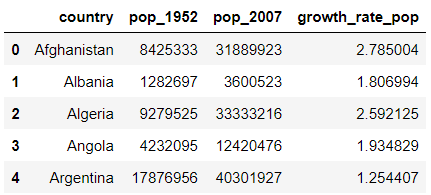

</details>

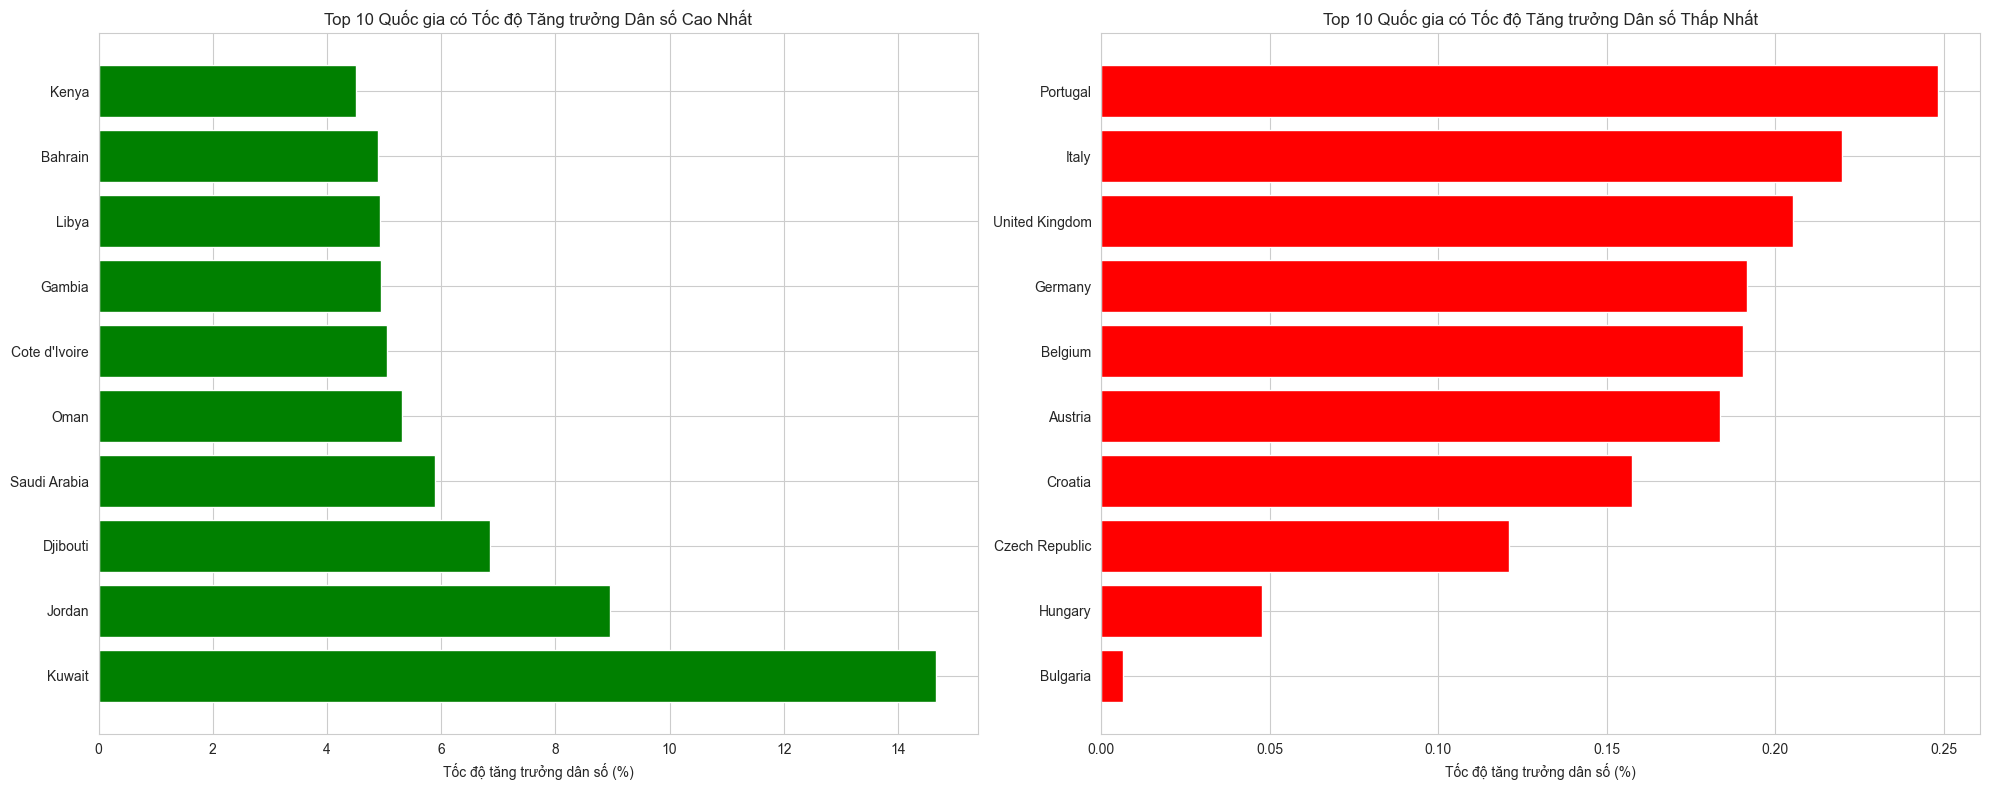

In [44]:
# Biểu đồ 10 quốc gia có tốc độ tăng trưởng dân số cao nhất
import matplotlib.pyplot as plt

# Sắp xếp dataframe theo tốc độ tăng trưởng dân số
top_10_high_growth = growth_rate_pop_df.sort_values(by='growth_rate_pop', ascending=False).head(10)
top_10_low_growth = growth_rate_pop_df.sort_values(by='growth_rate_pop').head(10)

# Biểu đồ 10 quốc gia có tốc độ tăng trưởng dân số cao nhất
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.barh(top_10_high_growth['country'], top_10_high_growth['growth_rate_pop'], color='green')
plt.xlabel('Tốc độ tăng trưởng dân số (%)')
plt.title('Top 10 Quốc gia có Tốc độ Tăng trưởng Dân số Cao Nhất')

# Biểu đồ 10 quốc gia có tốc độ tăng trưởng dân số thấp nhất
plt.subplot(1, 2, 2)
plt.barh(top_10_low_growth['country'], top_10_low_growth['growth_rate_pop'], color='red')
plt.xlabel('Tốc độ tăng trưởng dân số (%)')
plt.title('Top 10 Quốc gia có Tốc độ Tăng trưởng Dân số Thấp Nhất')

plt.tight_layout()
plt.show()


In [43]:
# Hiển thị số liệu của biểu đồ 10 quốc gia có tốc độ tăng trưởng dân số cao nhất
print(top_10_high_growth[['country', 'growth_rate_pop']])

# Hiển thị số liệu của biểu đồ 10 quốc gia có tốc độ tăng trưởng dân số thấp nhất
print(top_10_low_growth[['country', 'growth_rate_pop']])


           country  growth_rate_pop
71          Kuwait        14.659744
67          Jordan         8.957318
35        Djibouti         6.860362
109   Saudi Arabia         5.890480
96            Oman         5.310927
30   Cote d'Ivoire         5.050821
46          Gambia         4.938235
75           Libya         4.920116
7          Bahrain         4.882861
68           Kenya         4.508961
            country  growth_rate_pop
15         Bulgaria         0.006592
56          Hungary         0.047570
33   Czech Republic         0.120936
31          Croatia         0.157405
6           Austria         0.183610
9           Belgium         0.190349
47          Germany         0.191697
133  United Kingdom         0.205160
64            Italy         0.219900
103        Portugal         0.248273


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
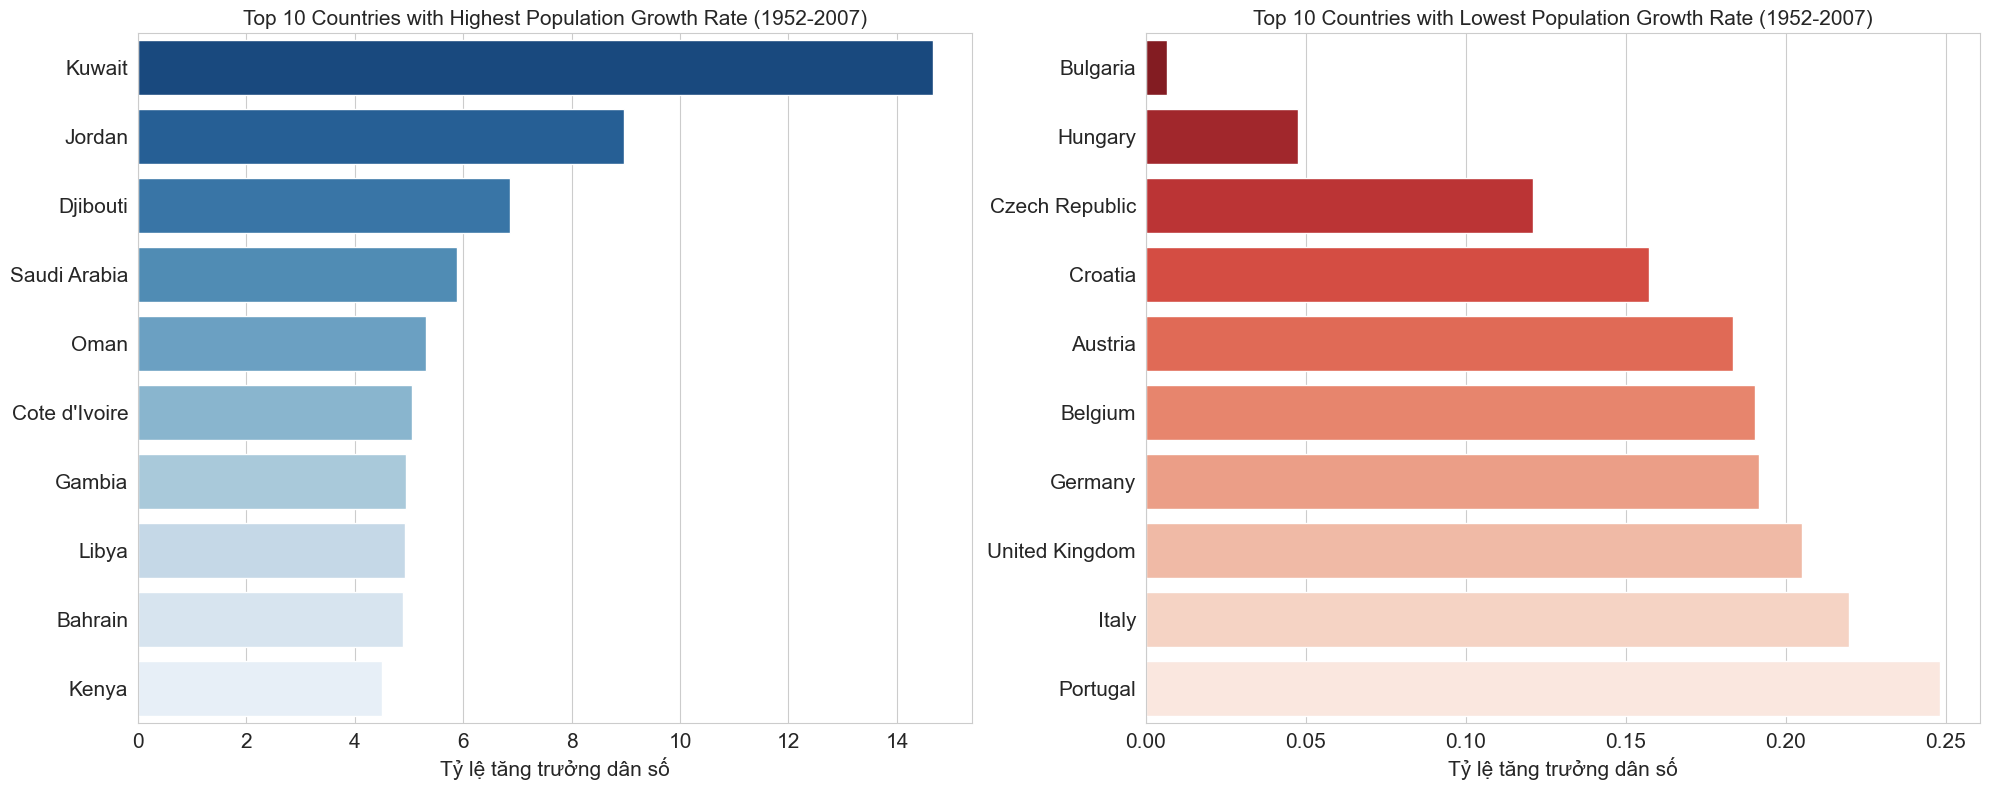

</details>

Bạn có nhận xét gì với biểu đồ trên?
#### Các nhận xét về tốc độ tăng trưởng dân số của 10 quốc gia có tốc độ tăng trưởng cao nhất và 10 quốc gia có tốc độ tăng trưởng thấp nhất như sau:

#### Top 10 Quốc gia có Tốc độ Tăng trưởng Dân số Cao Nhất:

- Kuwait có tốc độ tăng trưởng dân số cao nhất, với tăng trưởng lên đến 14.66%.
- Jordan, Djibouti, Saudi Arabia và Oman cũng có tốc độ tăng trưởng dân số khá cao, với tăng trưởng trên 5%.
- Các quốc gia khác trong danh sách cũng có tốc độ tăng trưởng dân số trên 4%.
#### Top 10 Quốc gia có Tốc độ Tăng trưởng Dân số Thấp Nhất:

- Bulgaria có tốc độ tăng trưởng dân số thấp nhất, chỉ tăng 0.0066%.
- Hungary, Czech Republic, và Croatia cũng có tốc độ tăng trưởng dân số rất thấp, dưới 0.2%.
- Các quốc gia khác trong danh sách cũng có tốc độ tăng trưởng dân số thấp, không vượt quá 0.25%.
#### Nhận xét này chỉ ra sự biến đổi đáng kể về tốc độ tăng trưởng dân số giữa các quốc gia, với một số quốc gia có tốc độ tăng trưởng dân số cao hơn đáng kể so với các quốc gia khác, trong khi một số quốc gia khác gặp khó khăn trong việc duy trì dân số.

### Bước 7 - Phân tích giá trị tăng trưởng của các quốc gia năm 2007 so với năm 1952
- Biểu đồ thể hiện 5 quốc gia có tăng trưởng tuổi thọ trung bình cao nhất
- Biểu đồ thể hiện 5 quốc gia có tăng trưởng GDP bình quân đầu người cao nhất

In [46]:
# Xác định sự cải thiện về tuổi thọ trung bình từ 1952 đến 2007

# 5 quốc gia có sự cải thiện về tuổi thọ trung bình nhanh nhất
import pandas as pd



# Tính tuổi thọ trung bình cho năm 1952 và 2007 cho mỗi quốc gia
life_exp_1952 = gapminder[gapminder['year'] == 1952][['country', 'lifeExp']]
life_exp_2007 = gapminder[gapminder['year'] == 2007][['country', 'lifeExp']]

# Gộp dữ liệu từ năm 1952 và 2007
life_exp_change = pd.merge(life_exp_1952, life_exp_2007, on='country', suffixes=('_1952', '_2007'))

# Tính tốc độ cải thiện tuổi thọ trung bình
life_exp_change['improvement'] = life_exp_change['lifeExp_2007'] - life_exp_change['lifeExp_1952']

# Sắp xếp theo tốc độ cải thiện giảm dần và chọn 5 quốc gia có sự cải thiện nhanh nhất
top_5_improvements = life_exp_change.sort_values(by='improvement', ascending=False).head(5)

# Hiển thị danh sách 5 quốc gia có sự cải thiện nhanh nhất
print(top_5_improvements)


          country  lifeExp_1952  lifeExp_2007  improvement
96           Oman        37.578        75.640       38.062
137       Vietnam        40.412        74.249       33.837
59      Indonesia        37.468        70.650       33.182
109  Saudi Arabia        39.875        72.777       32.902
75          Libya        42.723        73.952       31.229


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
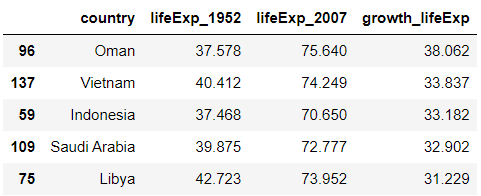

</details>

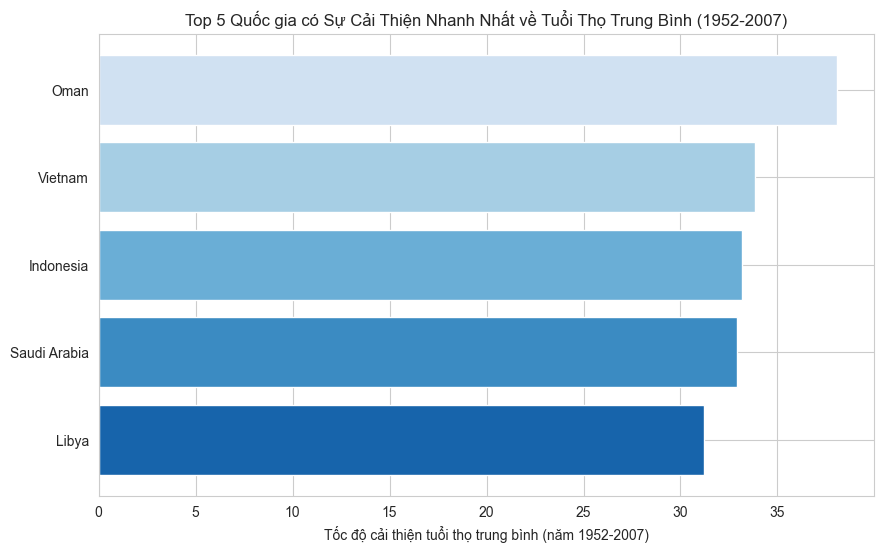

In [49]:
# Biểu đồ 5 quốc gia có sự cải thiện về tuổi thọ trung bình nhanh nhất (1952-2007)

import numpy as np

# Tính tuổi thọ trung bình cho năm 1952 và 2007 cho mỗi quốc gia
life_exp_1952 = gapminder[gapminder['year'] == 1952][['country', 'lifeExp']]
life_exp_2007 = gapminder[gapminder['year'] == 2007][['country', 'lifeExp']]

# Gộp dữ liệu từ năm 1952 và 2007
life_exp_change = pd.merge(life_exp_1952, life_exp_2007, on='country', suffixes=('_1952', '_2007'))

# Tính tốc độ cải thiện tuổi thọ trung bình
life_exp_change['improvement'] = life_exp_change['lifeExp_2007'] - life_exp_change['lifeExp_1952']

# Sắp xếp theo tốc độ cải thiện giảm dần và chọn 5 quốc gia có sự cải thiện nhanh nhất
top_5_improvements = life_exp_change.sort_values(by='improvement', ascending=False).head(5)

# Tạo một dãy màu nhạt dần từ xanh đến xám
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(top_5_improvements)))

# Vẽ biểu đồ cột với màu nhạt dần
plt.figure(figsize=(10, 6))
plt.barh(top_5_improvements['country'], top_5_improvements['improvement'], color=colors)
plt.xlabel('Tốc độ cải thiện tuổi thọ trung bình (năm 1952-2007)')
plt.title('Top 5 Quốc gia có Sự Cải Thiện Nhanh Nhất về Tuổi Thọ Trung Bình (1952-2007)')
plt.gca().invert_yaxis()  # Đảo ngược trục Y để quốc gia có tốc độ cải thiện cao nhất ở trên cùng

# Hiển thị biểu đồ
plt.show()


In [50]:
# Sắp xếp theo tốc độ cải thiện giảm dần và chọn 5 quốc gia có sự cải thiện nhanh nhất
top_5_improvements = life_exp_change.sort_values(by='improvement', ascending=False).head(5)

# In ra số liệu cho 5 quốc gia có sự cải thiện nhanh nhất
print("Top 5 Quốc gia có Sự Cải Thiện Nhanh Nhất về Tuổi Thọ Trung Bình (1952-2007):")
print(top_5_improvements[['country', 'improvement']])


Top 5 Quốc gia có Sự Cải Thiện Nhanh Nhất về Tuổi Thọ Trung Bình (1952-2007):
          country  improvement
96           Oman       38.062
137       Vietnam       33.837
59      Indonesia       33.182
109  Saudi Arabia       32.902
75          Libya       31.229


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
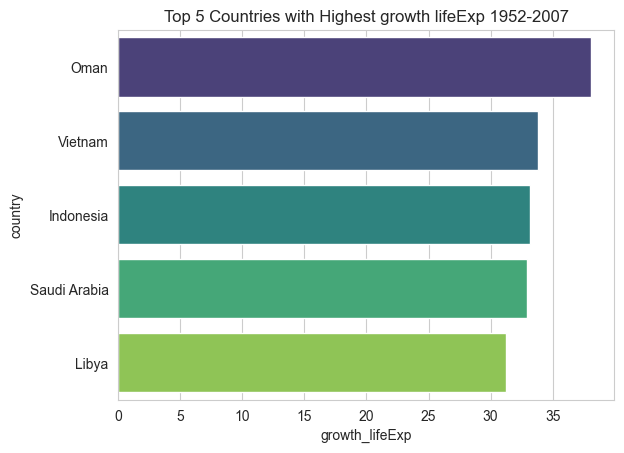

</details>

Bạn có nhận xét gì với biểu đồ trên?
#### Top 5 quốc gia có sự cải thiện nhanh nhất về tuổi thọ trung bình từ năm 1952 đến năm 2007 là:

- Oman: Sự cải thiện lớn nhất với tăng 38.062 năm tuổi thọ trung bình.
- Vietnam: Đứng thứ hai với tăng 33.837 năm tuổi thọ trung bình.
- Indonesia: Xếp hạng thứ ba với tăng 33.182 năm tuổi thọ trung bình.
- Saudi Arabia: Xếp hạng thứ tư với tăng 32.902 năm tuổi thọ trung bình.
- Libya: Đứng thứ năm với tăng 31.229 năm tuổi thọ trung bình.


In [57]:
# Xác định sự cải thiện về GDP bình quân đầu người từ 1952 đến 2007

# 5 quốc gia có sự cải thiện về GDP bình quân đầu người nhanh nhất
# Tính GDP bình quân đầu người năm 1952 và 2007 cho từng quốc gia
gdp_1952 = gapminder[gapminder['year'] == 1952][['country', 'gdpPercap']]
gdp_2007 = gapminder[gapminder['year'] == 2007][['country', 'gdpPercap']]

# Merge hai DataFrame theo cột 'country'
gdp_growth_df = gdp_1952.merge(gdp_2007, on='country', suffixes=('_1952', '_2007'))

# Tính tốc độ cải thiện về GDP bình quân đầu người và thêm vào DataFrame
gdp_growth_df['growth_gdp'] = ((gdp_growth_df['gdpPercap_2007'] - gdp_growth_df['gdpPercap_1952']) / gdp_growth_df['gdpPercap_1952']) * 100

# Sắp xếp theo tốc độ cải thiện và chọn 5 quốc gia có tốc độ nhanh nhất
top_5_growth_gdp = gdp_growth_df.sort_values(by='growth_gdp', ascending=False).head(5)

# In ra 5 quốc gia có tốc độ cải thiện nhanh nhất
print(top_5_growth_gdp)


               country  gdpPercap_1952  gdpPercap_2007   growth_gdp
40   Equatorial Guinea      375.643123     12154.08975  3135.541662
125             Taiwan     1206.947913     28718.27684  2279.413107
70         Korea, Rep.     1030.592226     23348.13973  2165.507069
113          Singapore     2315.138227     47143.17964  1936.300861
13            Botswana      851.241141     12569.85177  1376.649937


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
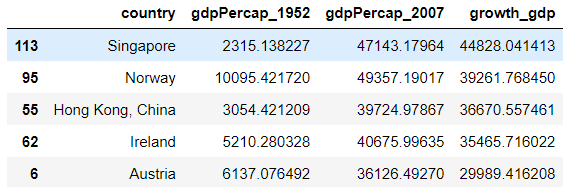

</details>

In [ ]:
# Biểu đồ 5 quốc gia có sự cải thiện về GDP bình quân đầu người nhanh nhất (1952-2007)


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
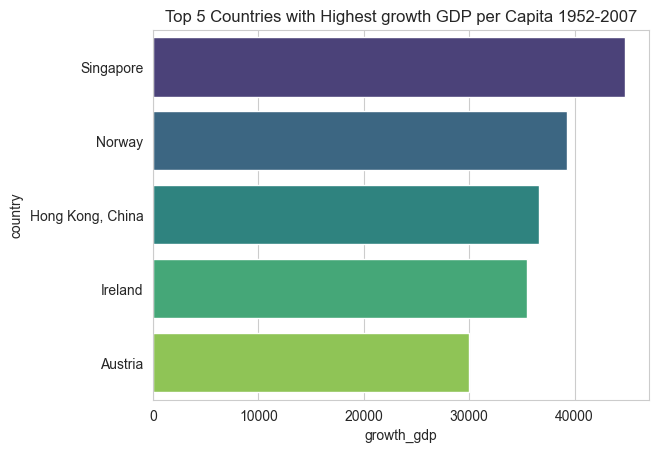

</details>

Bạn có nhận xét gì với biểu đồ trên?

### Bước 8 - Phân tích giá trị tăng trưởng của các châu lục năm 2007 so với năm 1952
- Biểu đồ thể hiện tăng trưởng tuổi thọ của các châu lục
- Biểu đồ thể hiện tăng trưởng GDP bình quân đầu người của các châu lục

In [ ]:
# Xác định sự cải thiện theo lục địa về tuổi thọ trung bình từ 1952 đến 2007


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
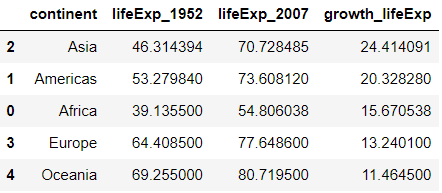

</details>

In [ ]:
# Xác định sự cải thiện theo lục địa về GDP bình quân đầu người từ 1952 đến 2007


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
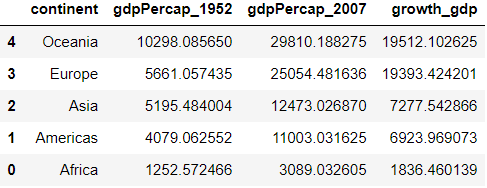

</details>

In [ ]:
plt.figure(figsize=(10,4))
# Biểu đồ thể hiện sự cải thiện về tuổi thọ trung bình của các châu lục (1952-2007)
plt.subplot(1, 2, 1)

# Biểu đồ thể hiện sự cải thiện về GDP bình quân đầu người của các châu lục (1952-2007)
plt.subplot(1, 2, 2)


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
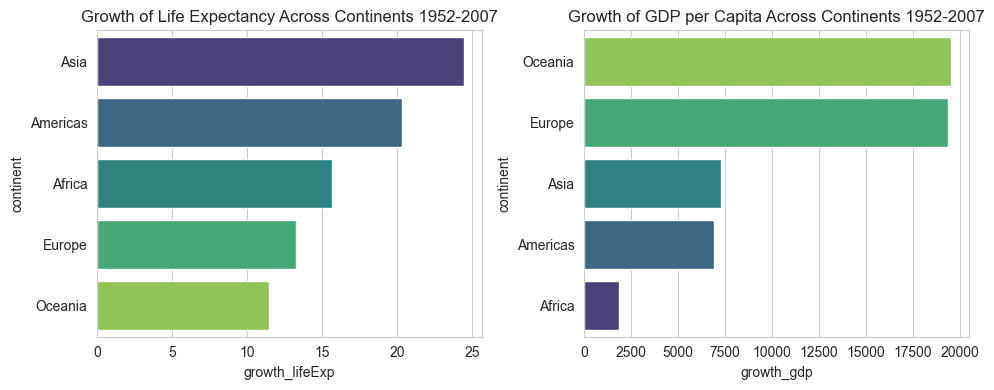

</details>

Bạn có nhận xét gì với biểu đồ trên?

### Bước 9 - Phân tích các chỉ số kinh tế xã hội của các quốc gia trên thế giới năm 2007
- Biểu đồ thể hiện 5 quốc gia có GDP bình quân đầu người cao nhất
- Biểu đồ thể hiện 5 quốc gia có GDP bình quân đầu người thấp nhất
- Biểu đồ thể hiện tương quan giữa GDP bình quân đầu người và tuổi thọ

In [ ]:
# 5 quốc gia có GDP bình quân đầu người cao nhất năm 2007


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
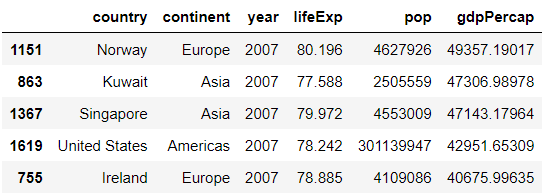

</details>

In [ ]:
# 5 quốc gia có GDP bình quân đầu người thấp nhất năm 2007


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
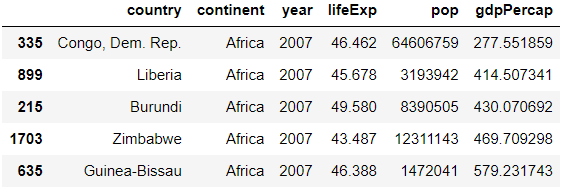

</details>

In [ ]:
plt.figure(figsize=(10,4))
# Biểu đồ 5 quốc gia có GDP bình quân đầu người cao nhất năm 2007
plt.subplot(1, 2, 1)

# Biểu đồ 5 quốc gia có GDP bình quân đầu người thấp nhất năm 2007
plt.subplot(1, 2, 2)


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
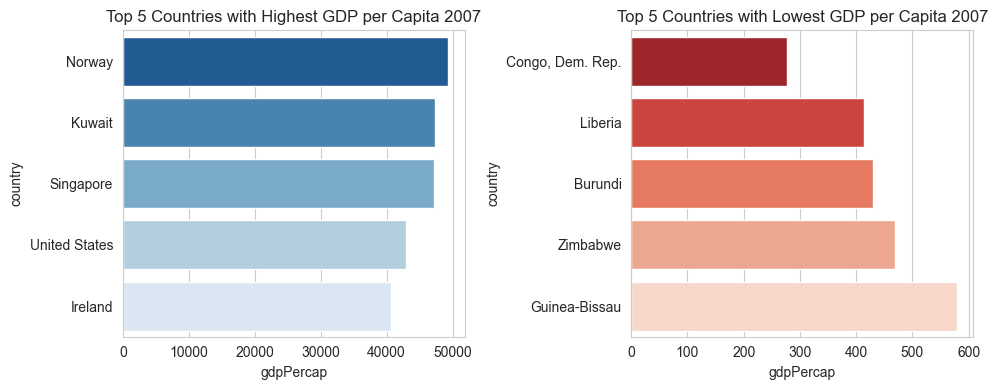

</details>

Bạn có nhận xét gì với biểu đồ trên?

In [ ]:
# Biểu đồ phân tán giữa tuổi thọ, GDP bình quân đầu người và dân số cho năm 2007


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>

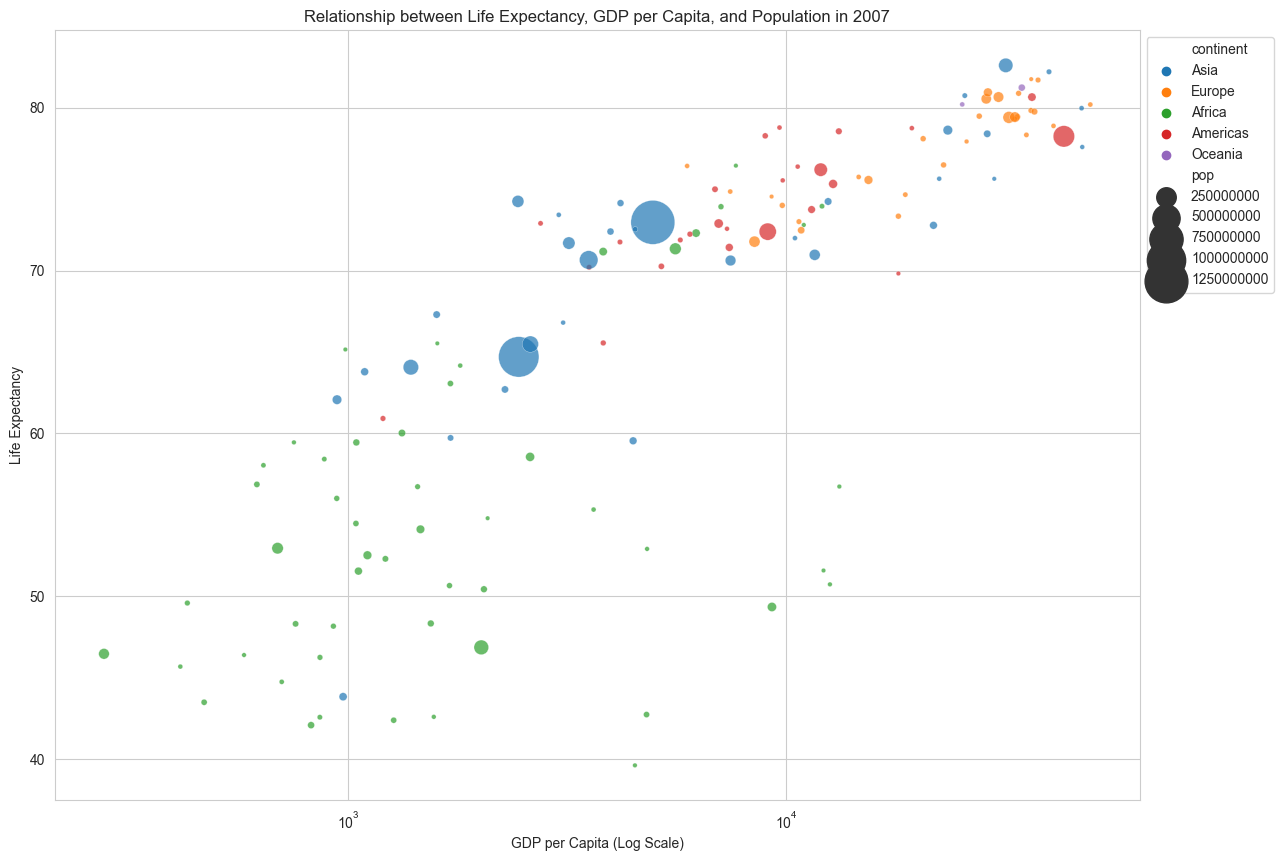

</details>

Bạn có nhận xét gì với biểu đồ trên?